# External packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import MaxAbsScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import make_scorer, get_scorer, log_loss, check_scoring
from time import time
from re import sub

# Internal packages

In [2]:
from sys import path
path.insert(1, '/home/mauricio/code/mcr/')
from mcr.ml.model_selection.learning_curve import plot_learning_curve

# Motivation: documentation example
https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')
print(f'classes: {np.unique(y)}')

X shape: (1797, 64)
y shape: (1797,)
classes: [0 1 2 3 4 5 6 7 8 9]


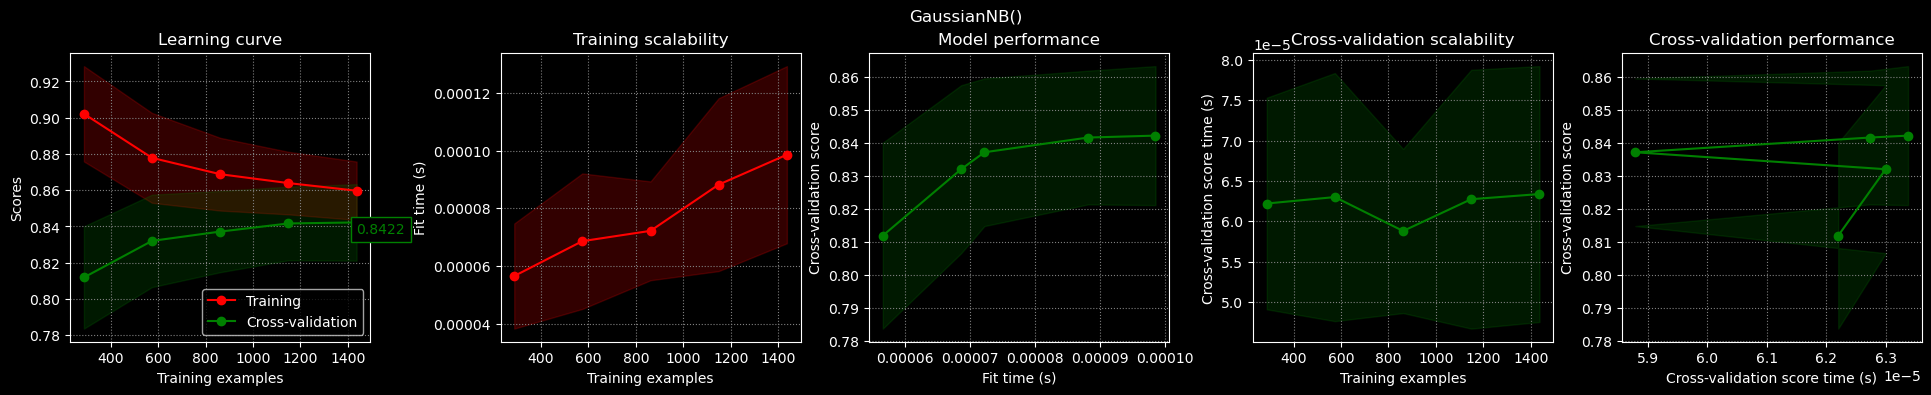

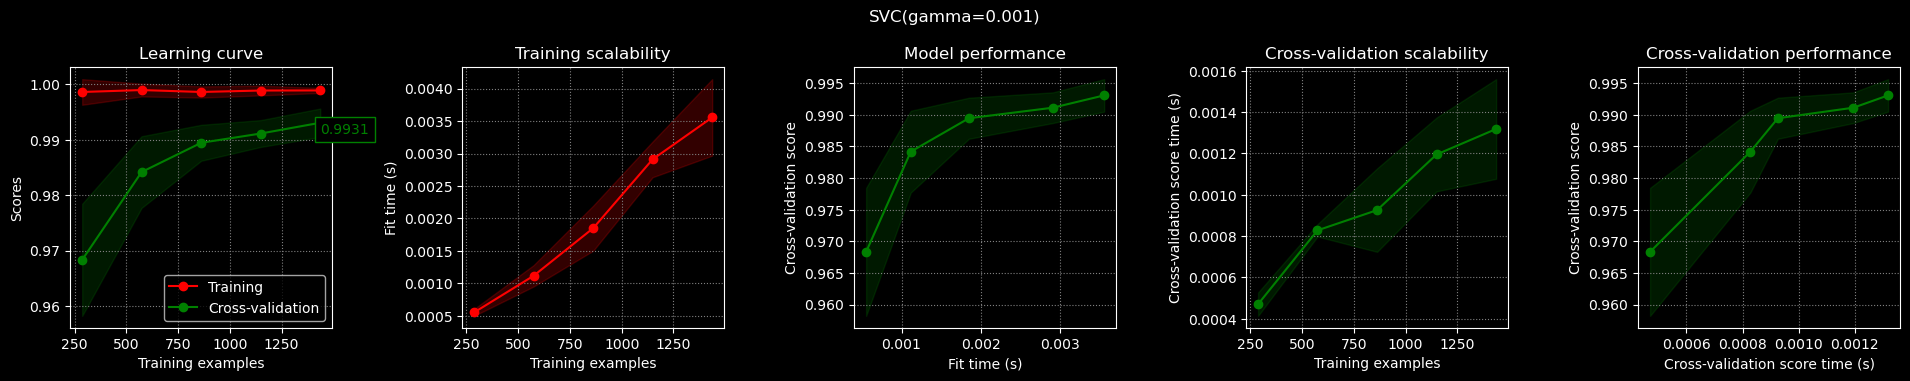

In [4]:
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = GaussianNB()
plot_learning_curve(estimator, X, y, title=repr(estimator), #ylim=(0.7, 1.01),
                    cv=cv, scoring=None, n_jobs=14)
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, X, y, title=repr(estimator), #ylim=(0.7, 1.01),
                    cv=cv, scoring=None, n_jobs=14)
plt.tight_layout()

# Learning curve for different classification problems

## Binary classification

In [5]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')
print(f'classes: {np.unique(y)}')

X shape: (569, 30)
y shape: (569,)
classes: [0 1]


In [6]:
X = MaxAbsScaler().fit_transform(X)

In [7]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

estimators = {'Dummy': DummyClassifier(strategy='prior'),
              'Logistic (lbfgs, ovr)': LogisticRegression(multi_class='ovr'),
              'Logistic (lbfgs, multinomial)': LogisticRegression(multi_class='multinomial'),
              'Logistic (liblinear, ovr)': LogisticRegression(solver='liblinear', multi_class='ovr'),
              'Random Forest': RandomForestClassifier(),
              'xgboost': XGBClassifier(),
              'GBM': GradientBoostingClassifier(),
              'SVC': SVC(probability=True),
              'GaussianNB': GaussianNB(),
              'K-Neighbors': KNeighborsClassifier()
             }

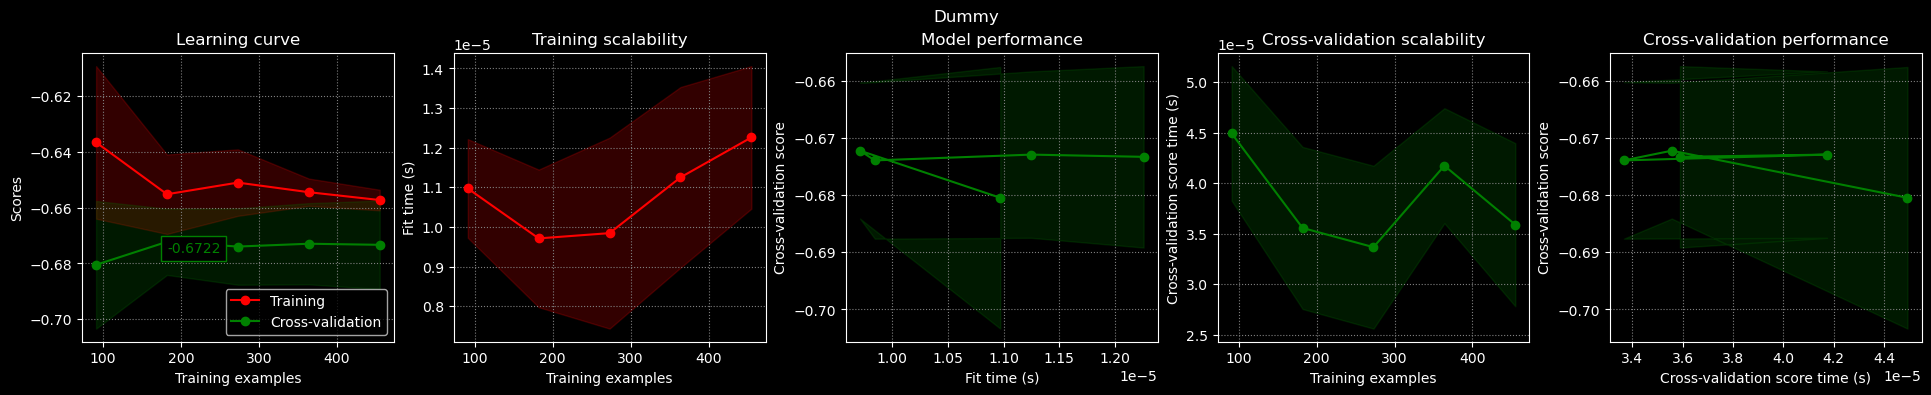

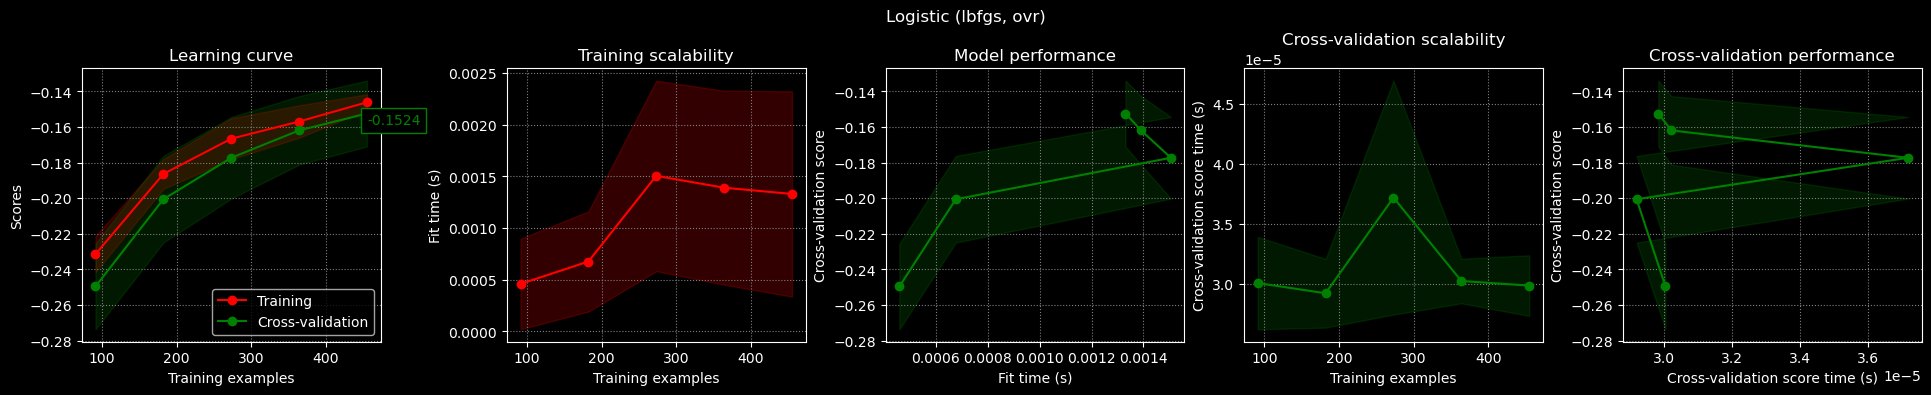

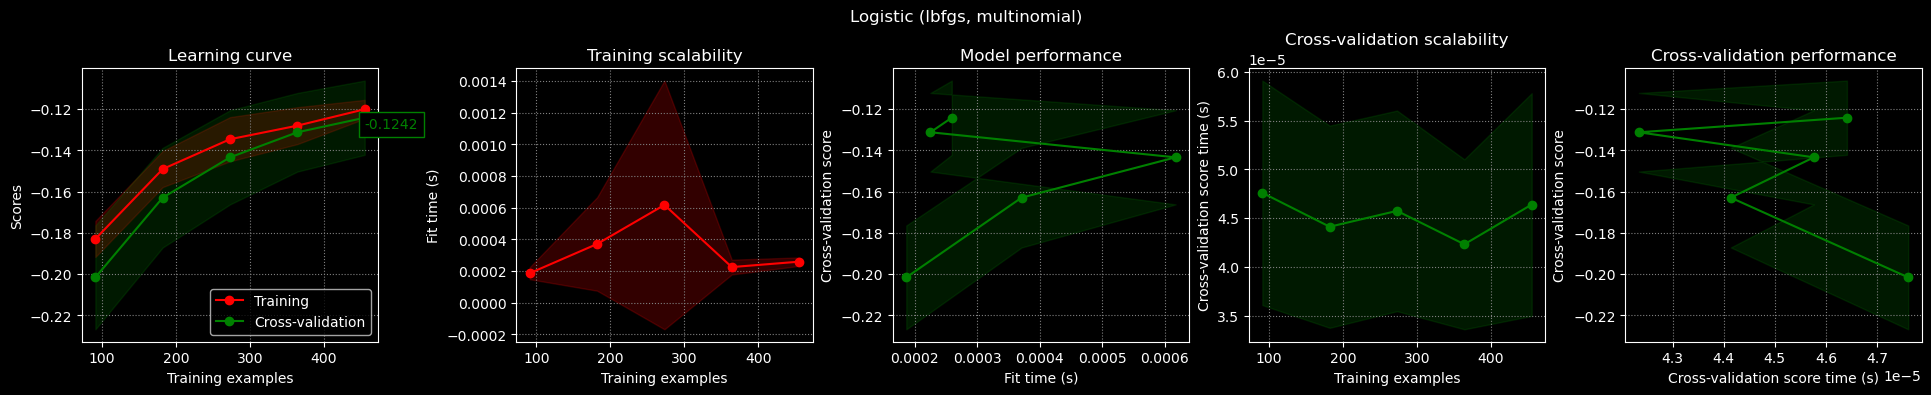

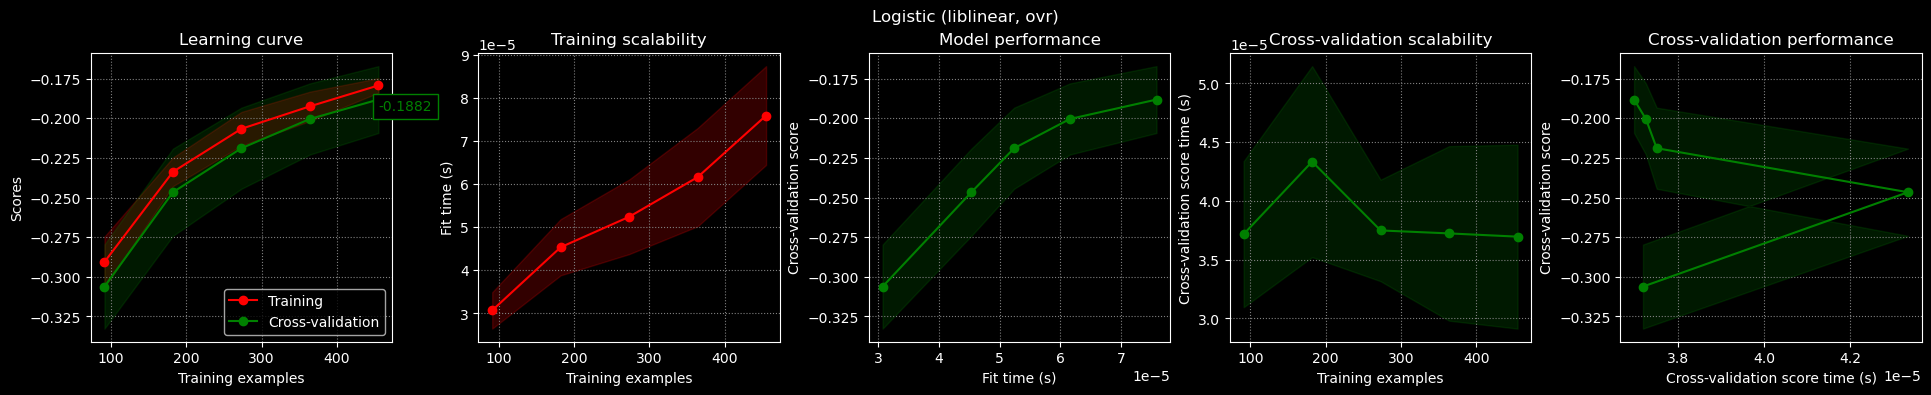

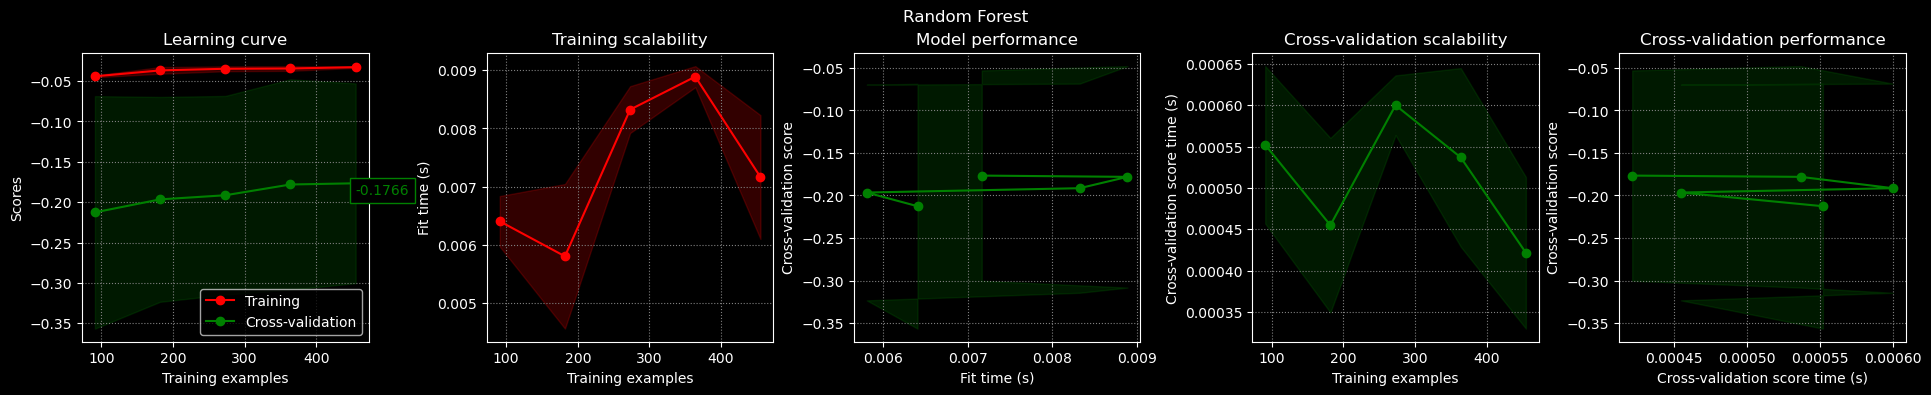

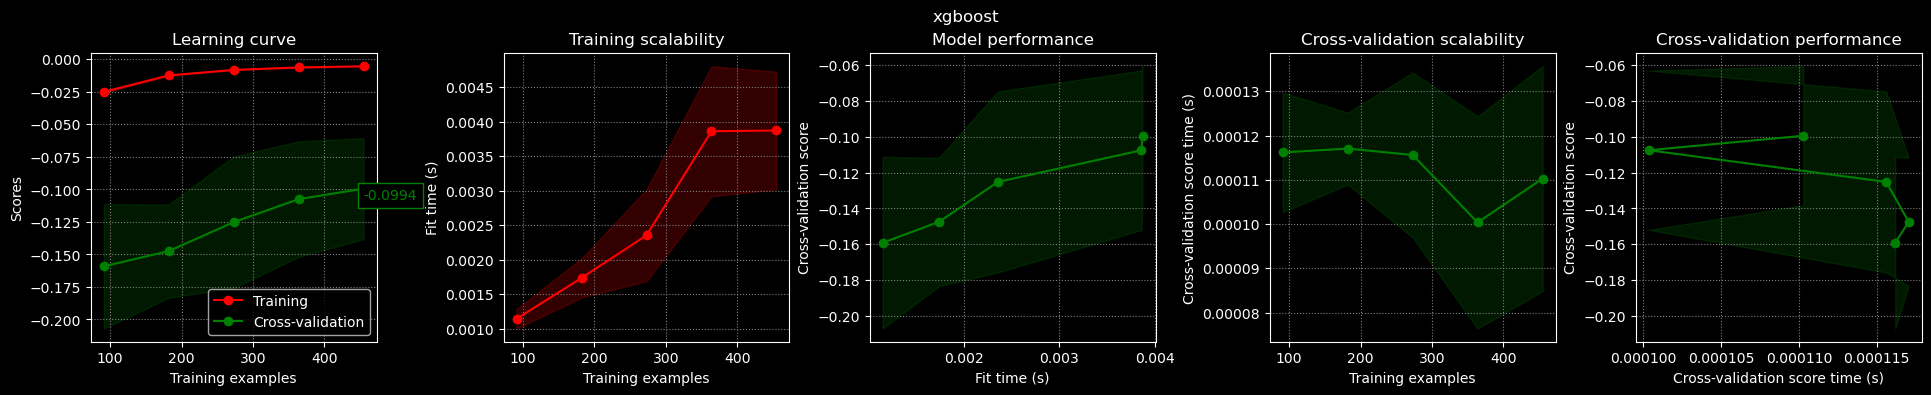

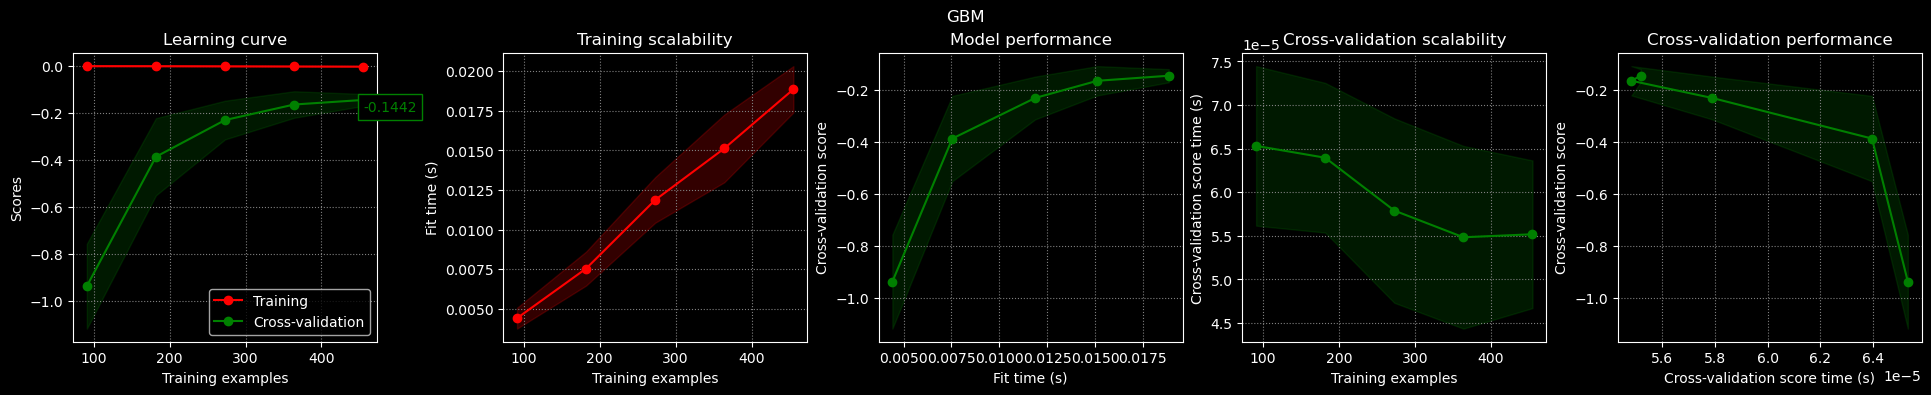

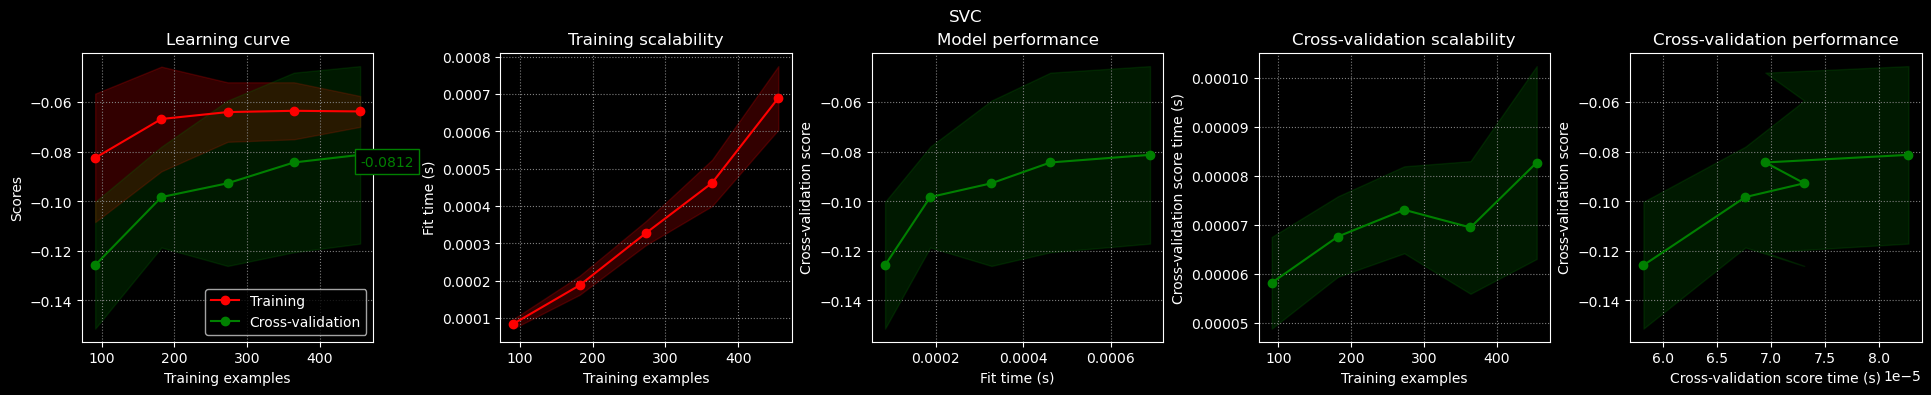

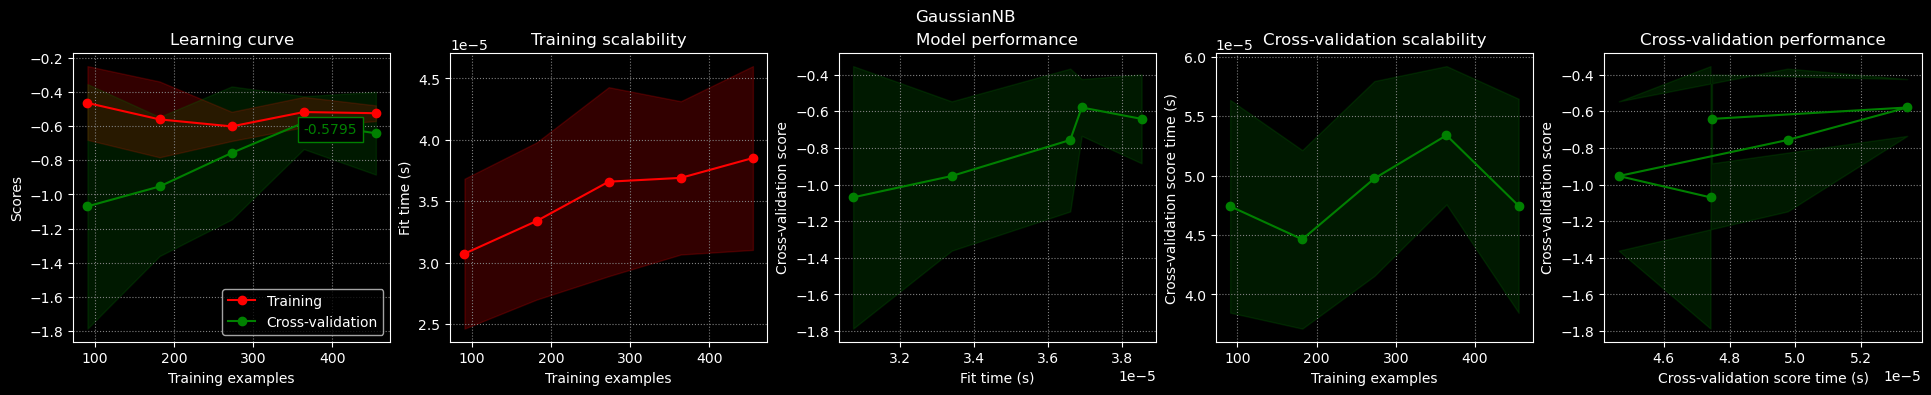

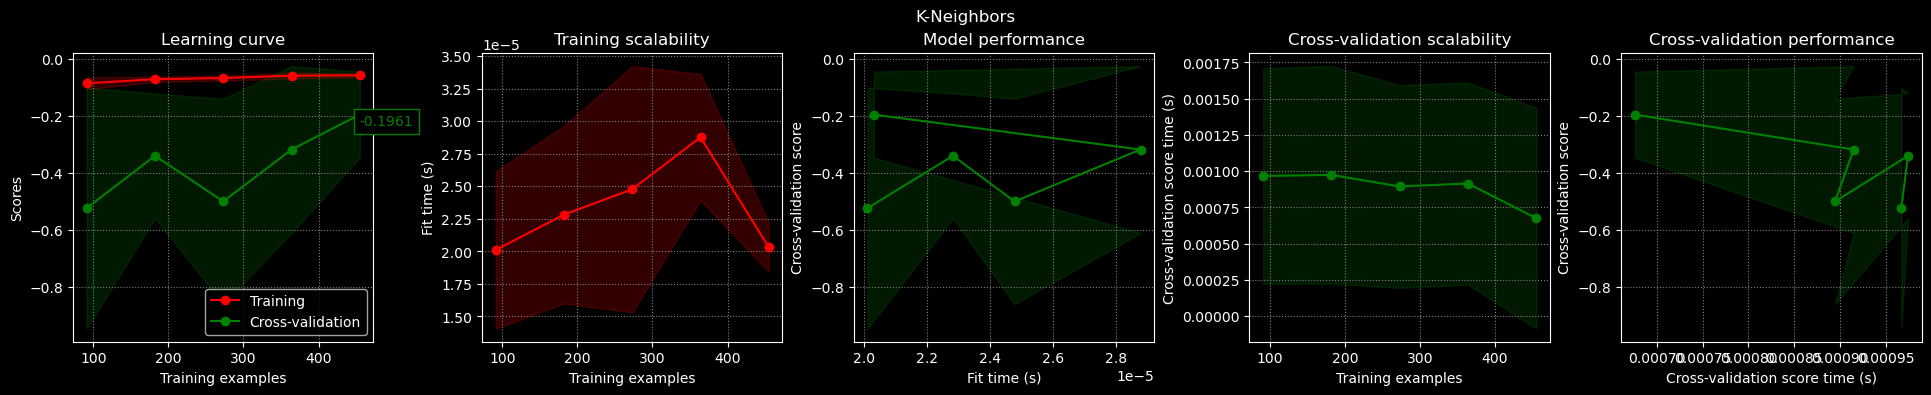

In [8]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)
for title, estimator in estimators.items():
    plot_learning_curve(estimator, X=X, y=y, title=title, cv=cv, scoring='neg_log_loss', n_jobs=14)

## Multi-class classification

From [documentation:](https://scikit-learn.org/stable/modules/multiclass.html)
> All classifiers in scikit-learn do multiclass classification out-of-the-box. You don’t need to use the `sklearn.multiclass` module unless you want to experiment with different multiclass strategies.

> **Multiclass classification** means a classification task with more than two classes; e.g., classify a set of images of fruits which may be oranges, apples, or pears. Multiclass classification makes the assumption that **each sample is assigned to one and only one label**: a fruit can be either an apple or a pear but not both at the same time.

In [9]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
print(f'X shape: {X.shape}'.format())
print(f'y shape: {y.shape}')
print(f'classes: {np.unique(y)}')

X shape: (1797, 64)
y shape: (1797,)
classes: [0 1 2 3 4 5 6 7 8 9]


In [10]:
X = MaxAbsScaler().fit_transform(X)

The following classifiers support multiclass without the need of a meta-estimator (e.g. OneVsRestClassifier()):

Inherently multiclass:

* sklearn.naive_bayes.BernoulliNB
* sklearn.tree.DecisionTreeClassifier
* sklearn.tree.ExtraTreeClassifier
* sklearn.ensemble.ExtraTreesClassifier
* sklearn.naive_bayes.GaussianNB
* sklearn.neighbors.KNeighborsClassifier
* sklearn.semi_supervised.LabelPropagation
* sklearn.semi_supervised.LabelSpreading
* sklearn.discriminant_analysis.LinearDiscriminantAnalysis
* sklearn.svm.LinearSVC (setting multi_class=”crammer_singer”)
* sklearn.linear_model.LogisticRegression (setting multi_class=”multinomial”)
* sklearn.linear_model.LogisticRegressionCV (setting multi_class=”multinomial”)
* sklearn.neural_network.MLPClassifier
* sklearn.neighbors.NearestCentroid
* sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis
* sklearn.neighbors.RadiusNeighborsClassifier
* sklearn.ensemble.RandomForestClassifier
* sklearn.linear_model.RidgeClassifier
* sklearn.linear_model.RidgeClassifierCV

Multiclass as One-Vs-One:

* sklearn.svm.NuSVC
* sklearn.svm.SVC.
* sklearn.gaussian_process.GaussianProcessClassifier (setting multi_class = “one_vs_one”)

Multiclass as One-Vs-All:

* sklearn.ensemble.GradientBoostingClassifier
* sklearn.gaussian_process.GaussianProcessClassifier (setting multi_class = “one_vs_rest”)
* sklearn.svm.LinearSVC (setting multi_class=”ovr”)
* sklearn.linear_model.LogisticRegression (setting multi_class=”ovr”)
* klearn.linear_model.LogisticRegressionCV (setting multi_class=”ovr”)
* klearn.linear_model.SGDClassifier
* klearn.linear_model.Perceptron
* klearn.linear_model.PassiveAggressiveClassifier

In [11]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

estimators = {
    'Dummy': DummyClassifier(strategy='prior'),
    'Logistic (lbfgs, ovr)': LogisticRegression(multi_class='ovr'),
    'Logistic (lbfgs, multinomial)': LogisticRegression(max_iter=200, multi_class='multinomial'),
    'Logistic (liblinear, ovr)': LogisticRegression(solver='liblinear', multi_class='ovr'),
    'Random Forest': RandomForestClassifier(),
    'xgboost': XGBClassifier(),
    'GBM': GradientBoostingClassifier(),
    'SVC': SVC(probability=True),
    'GaussianNB': GaussianNB(),
    'K-Neighbors': KNeighborsClassifier()
}

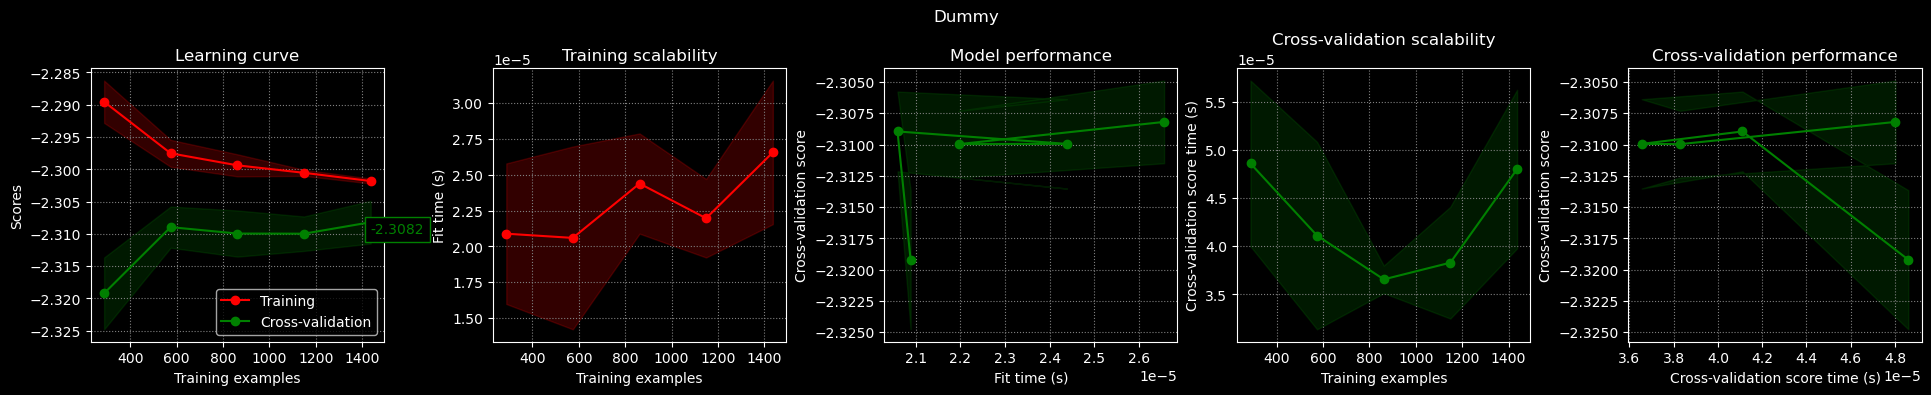

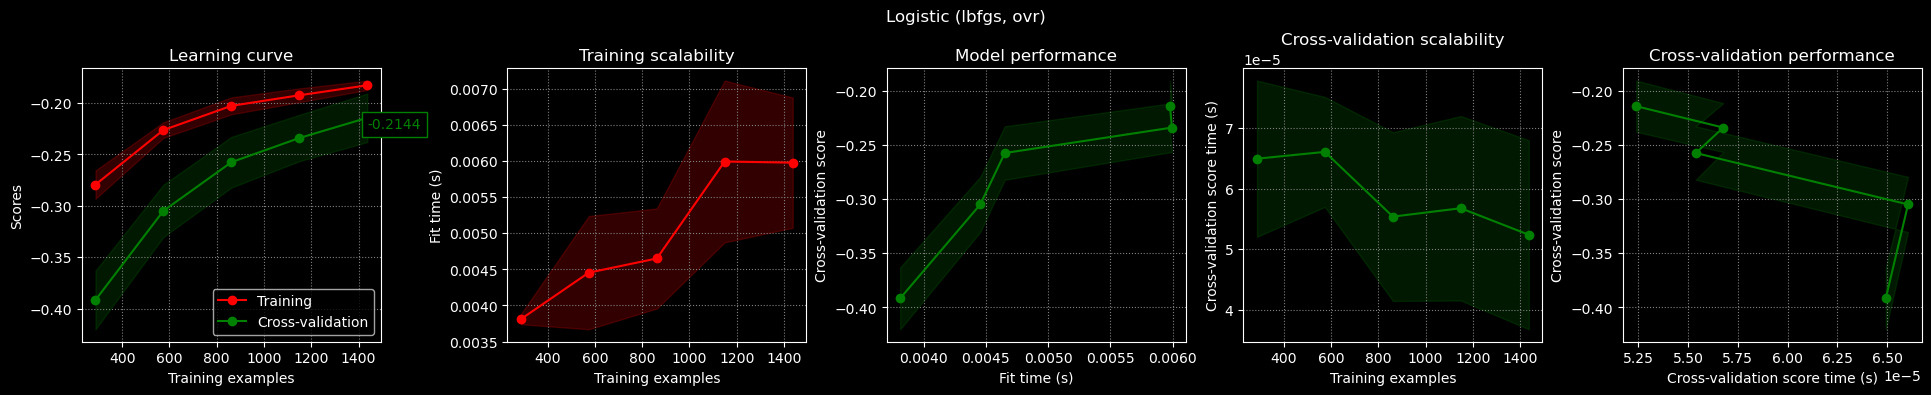

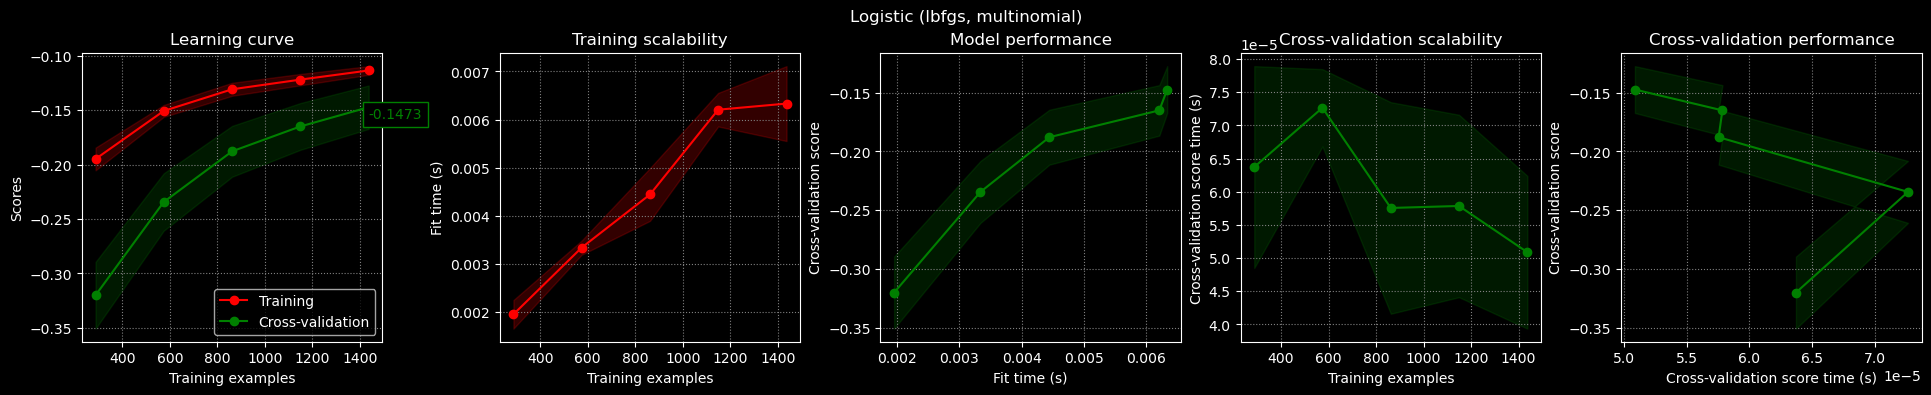

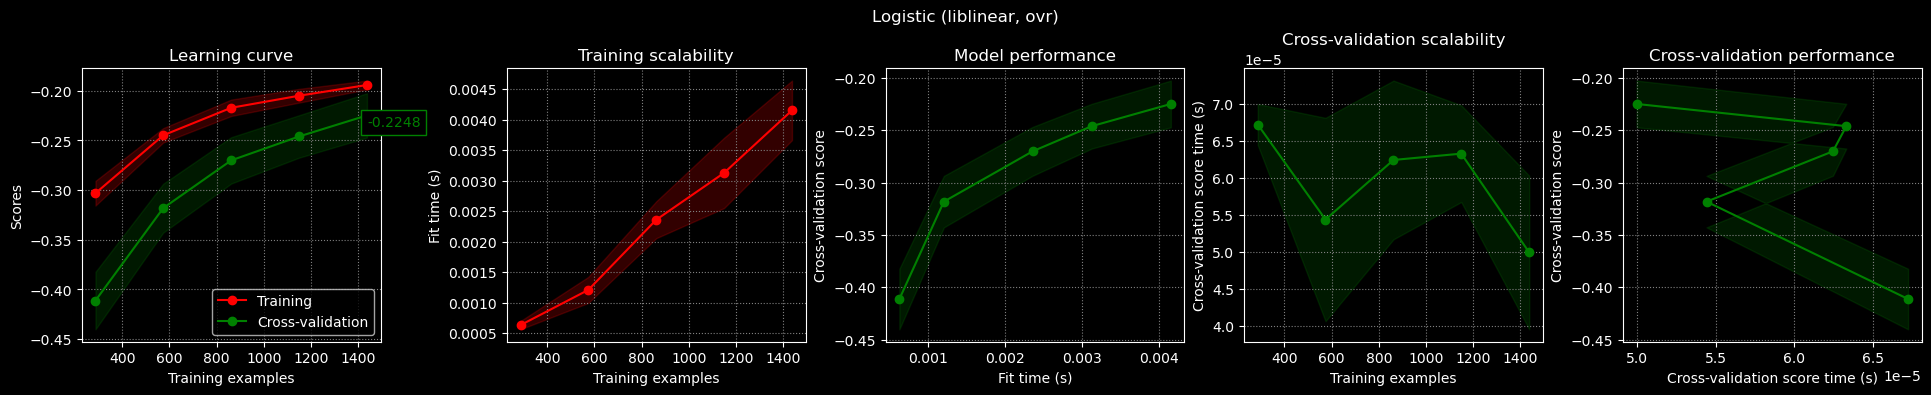

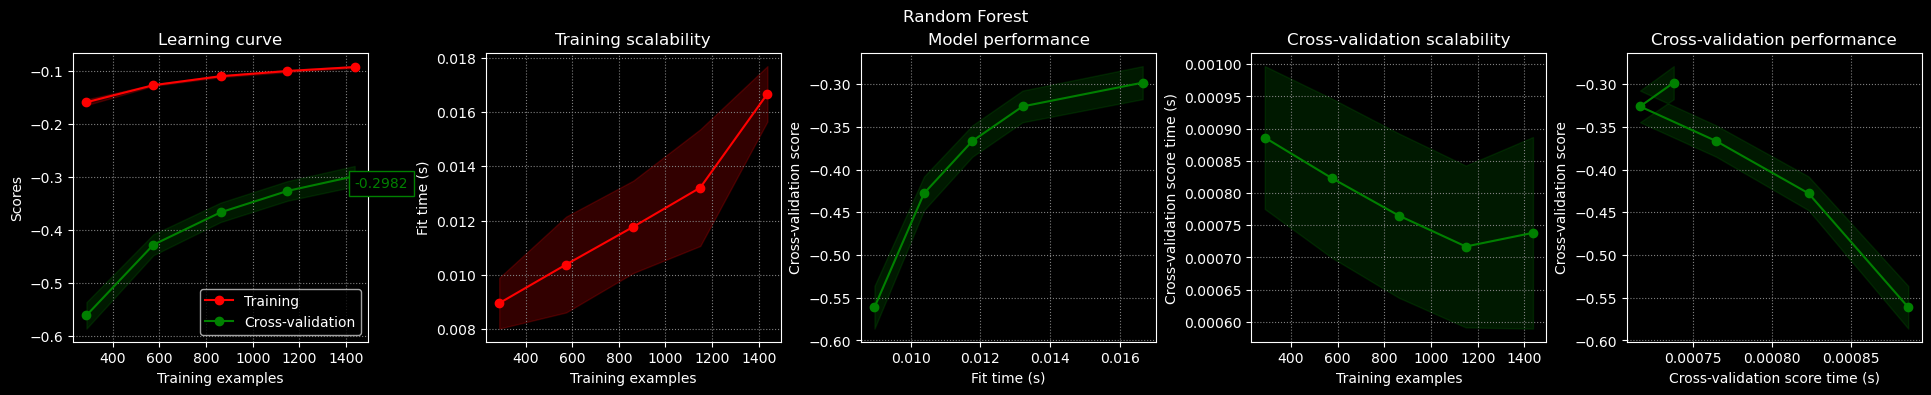

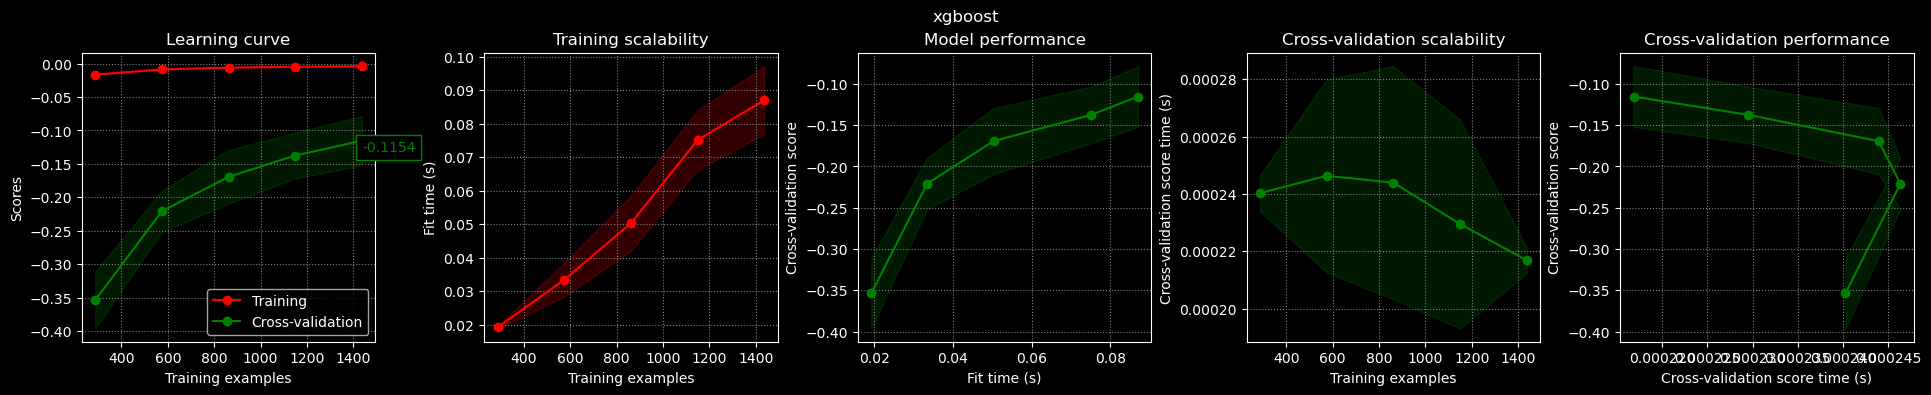

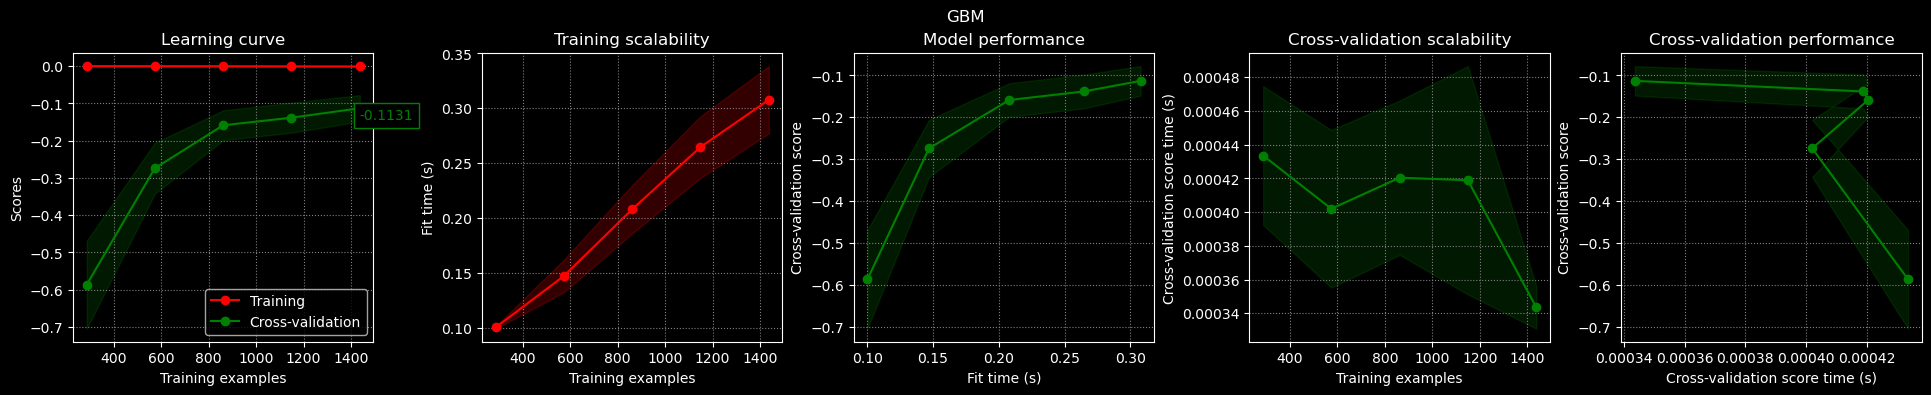

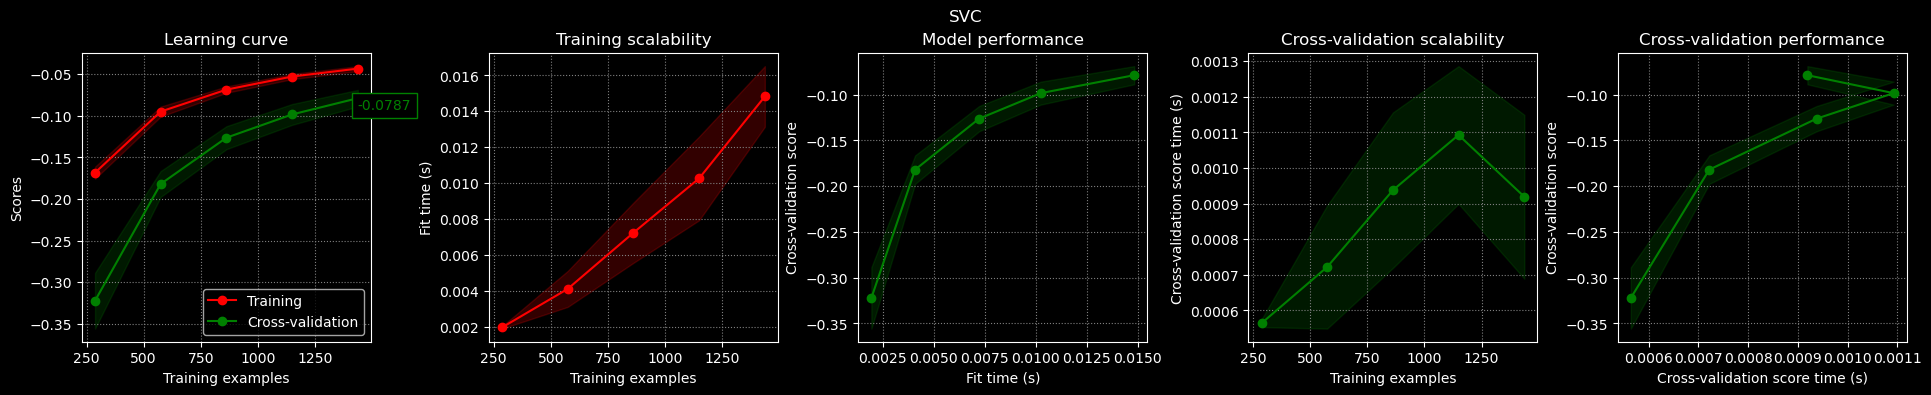

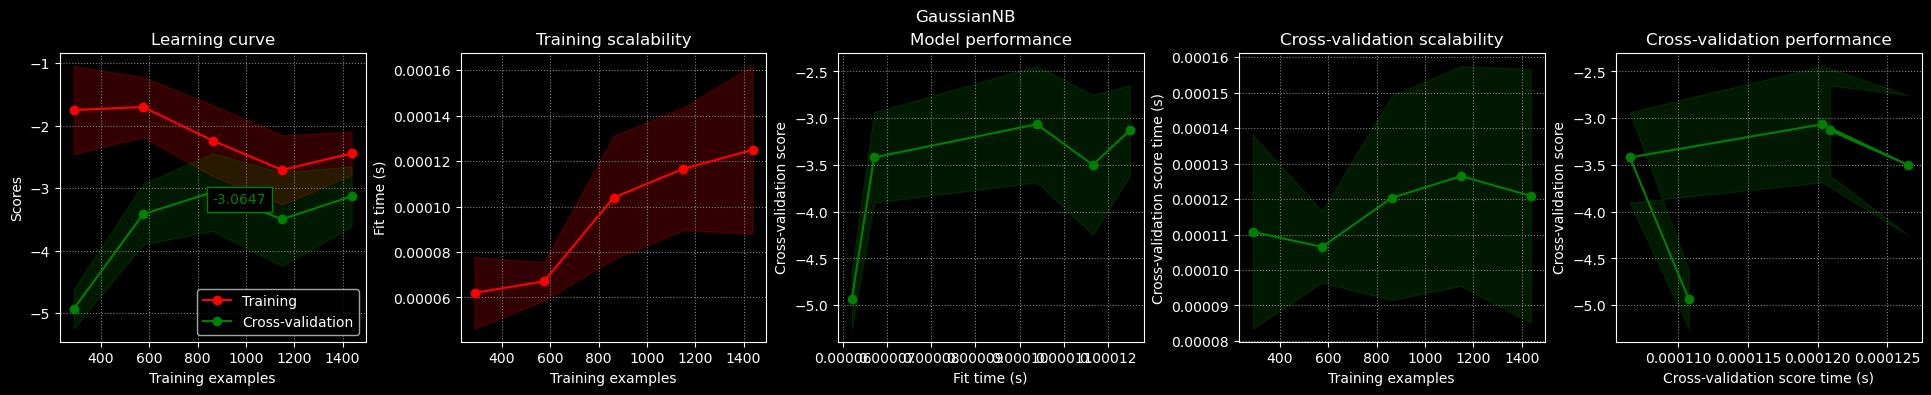

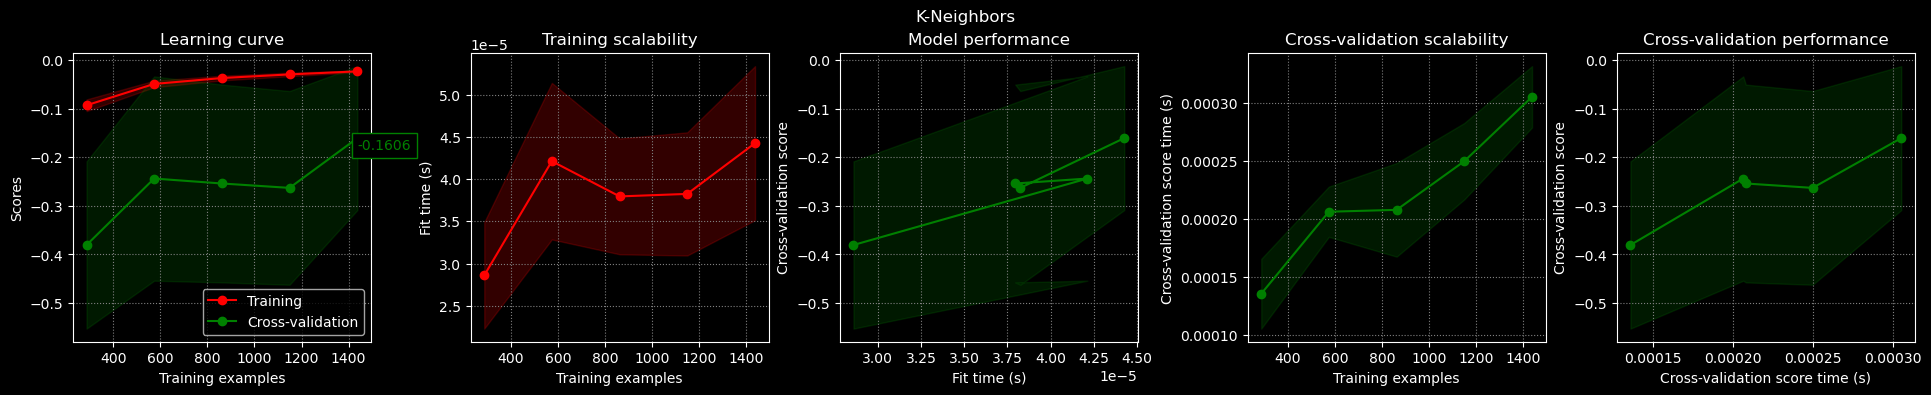

In [12]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)
for title, estimator in estimators.items():
    plot_learning_curve(estimator, X, y, title=title, cv=cv, scoring='neg_log_loss', n_jobs=14)

## Multi-label classification

[From documentation:](https://scikit-learn.org/stable/modules/multiclass.html)

> **Multilabel classification** assigns to each sample a set of target labels. This can be thought as predicting properties of a data-point that are not mutually exclusive, such as topics that are relevant for a document. A text might be about any of religion, politics, finance or education at the same time or none of these.

> In multilabel learning, the joint set of binary classification tasks is expressed with label binary indicator array: each sample is one row of a 2d array of shape (n_samples, n_classes) with binary values: the one, i.e. the non zero elements, corresponds to the subset of labels. An array such as `np.array([[1, 0, 0], [0, 1, 1], [0, 0, 0]])` represents label 0 in the first sample, labels 1 and 2 in the second sample, and no labels in the third sample.

In [13]:
from sklearn.datasets import make_multilabel_classification
X, y = make_multilabel_classification(n_samples=1797,
                                      n_features=64,
                                      n_classes=5,
                                      n_labels=2,
                                      random_state=1)
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape} Average labels: {np.ceil(np.sum(y, axis=1).mean()):.0f} Max labels: {np.sum(y, axis=1).max()}')
print(f'classes: {np.unique(y)}')
print(f'Label combinations:\n{np.unique(y, axis=0)}')

X shape: (1797, 64)
y shape: (1797, 5) Average labels: 2 Max labels: 5
classes: [0 1]
Label combinations:
[[0 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 1 1]
 [0 1 0 0 0]
 [0 1 0 0 1]
 [0 1 0 1 0]
 [0 1 0 1 1]
 [1 0 0 0 0]
 [1 0 0 0 1]
 [1 0 0 1 0]
 [1 0 0 1 1]
 [1 1 0 0 0]
 [1 1 0 0 1]
 [1 1 0 1 0]
 [1 1 0 1 1]
 [1 1 1 0 1]
 [1 1 1 1 1]]


In [14]:
X = MaxAbsScaler().fit_transform(X)

The following classifiers support multilabel without the need of a meta-estimator (e.g. `OneVsRestClassifier()`):

* sklearn.tree.DecisionTreeClassifier
* sklearn.tree.ExtraTreeClassifier
* sklearn.ensemble.ExtraTreesClassifier
* sklearn.neighbors.KNeighborsClassifier
* sklearn.neural_network.MLPClassifier
* sklearn.neighbors.RadiusNeighborsClassifier
* sklearn.ensemble.RandomForestClassifier
* sklearn.linear_model.RidgeClassifierCV

However, to use a loss function as scorer rather than the default accuracy, the meta-estimator `OneVsRestClassifier()` seems to be required.

In [15]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

estimators = {#'OvR Dummy (prior)': OneVsRestClassifier(DummyClassifier(strategy='prior')), # FutureWarning: `n_features_in_` is deprecated in 1.0 and will be removed in 1.2.
              'OvR Logistic (lbfgs, ovr)': OneVsRestClassifier(LogisticRegression(multi_class='ovr')),
              'OvR Logistic (lbfgs, multinomial)': OneVsRestClassifier(LogisticRegression(multi_class='multinomial')),
              'OvR Logistic (liblinear, ovr)': OneVsRestClassifier(LogisticRegression(solver='liblinear', multi_class='ovr')),
              'OvR Random Forest': OneVsRestClassifier(RandomForestClassifier()), #OvR required by loss scorer?
              'OvR xgboost': OneVsRestClassifier(XGBClassifier()),
              'OvR GBM': OneVsRestClassifier(GradientBoostingClassifier()),
              'OvR SVC': OneVsRestClassifier(SVC(probability=True)),
              'OvR GaussianNB': OneVsRestClassifier(GaussianNB()),
              'OvR K-Neighbors': OneVsRestClassifier(KNeighborsClassifier()) #OvR required by loss scorer?
             }

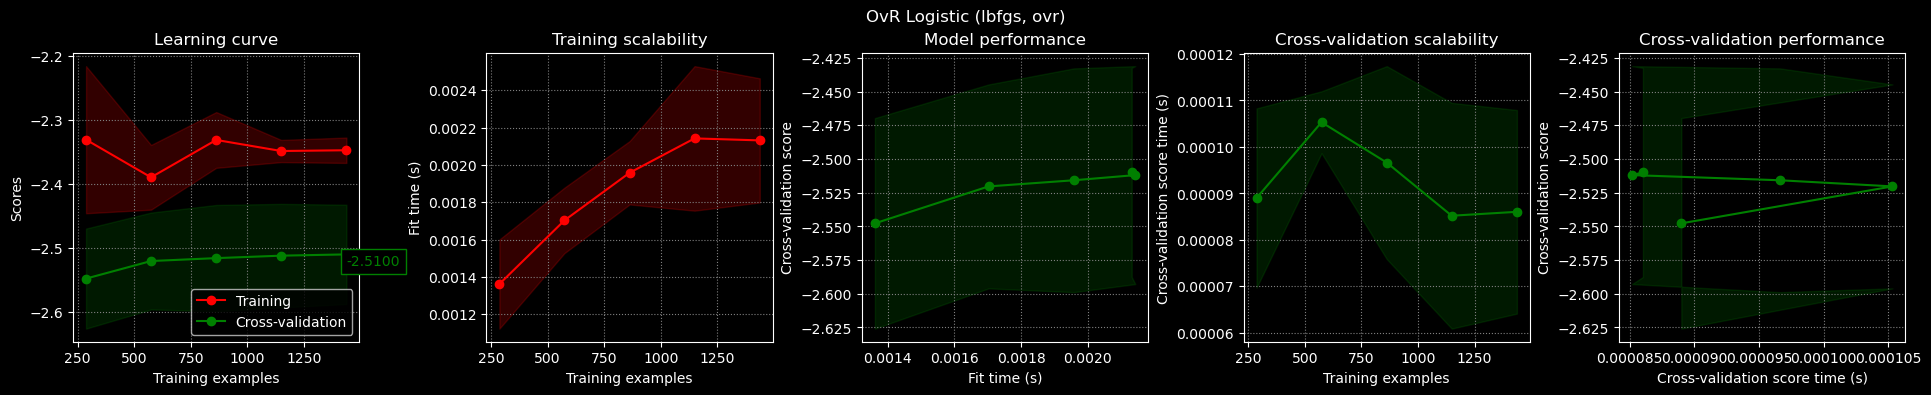

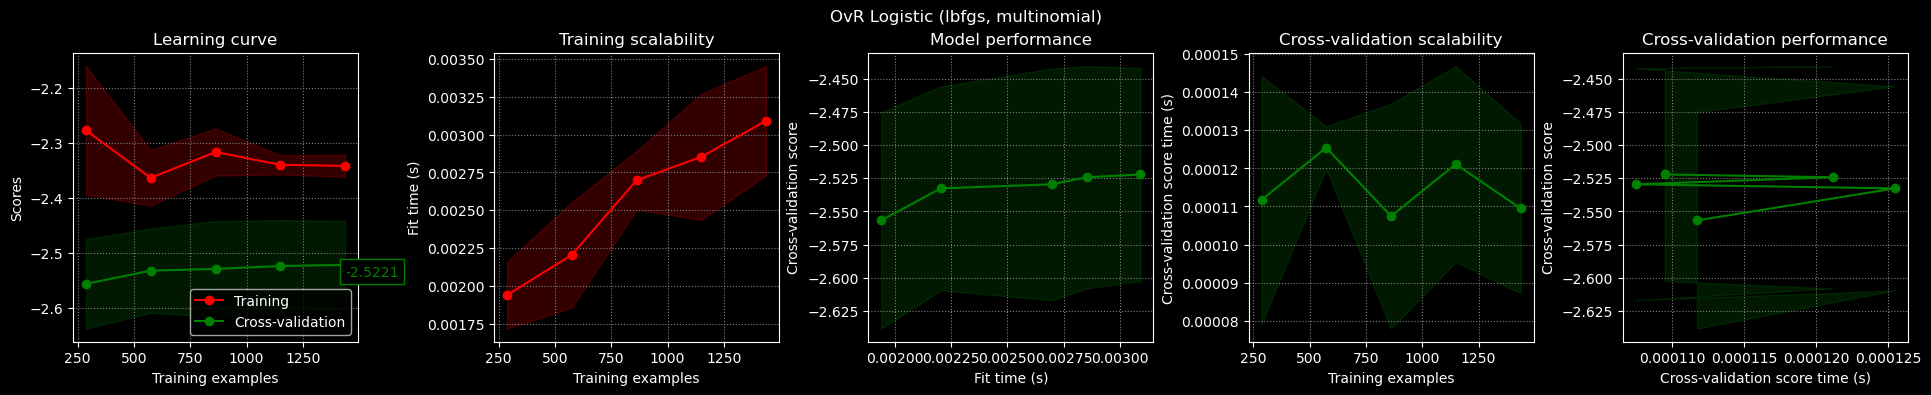

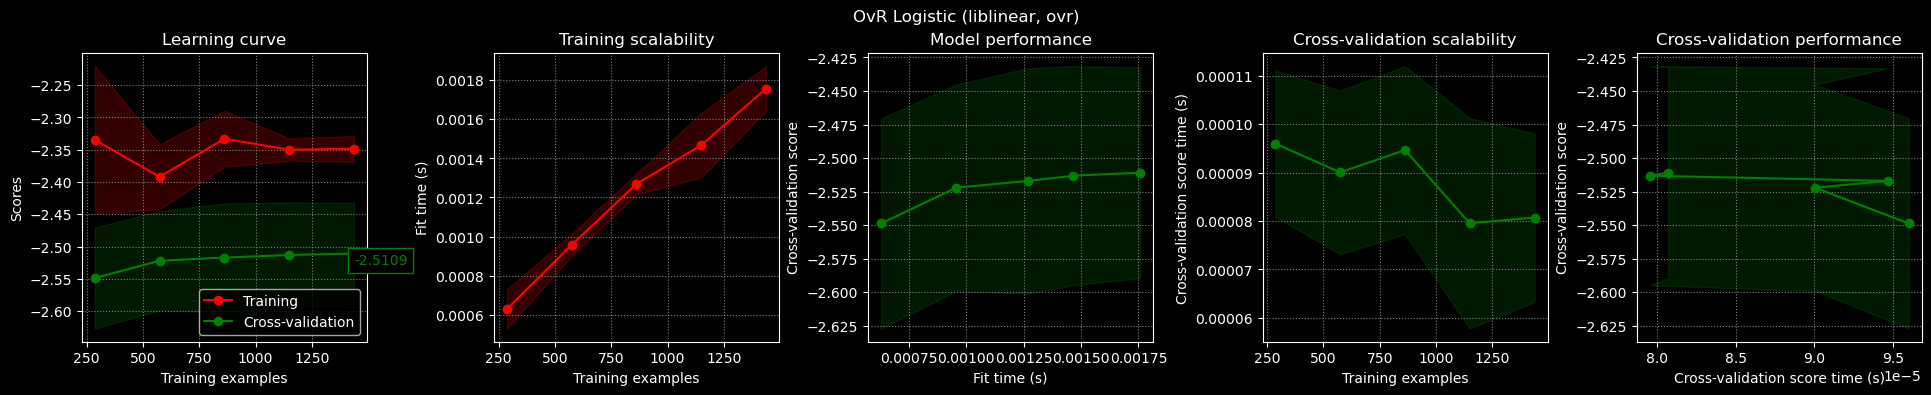

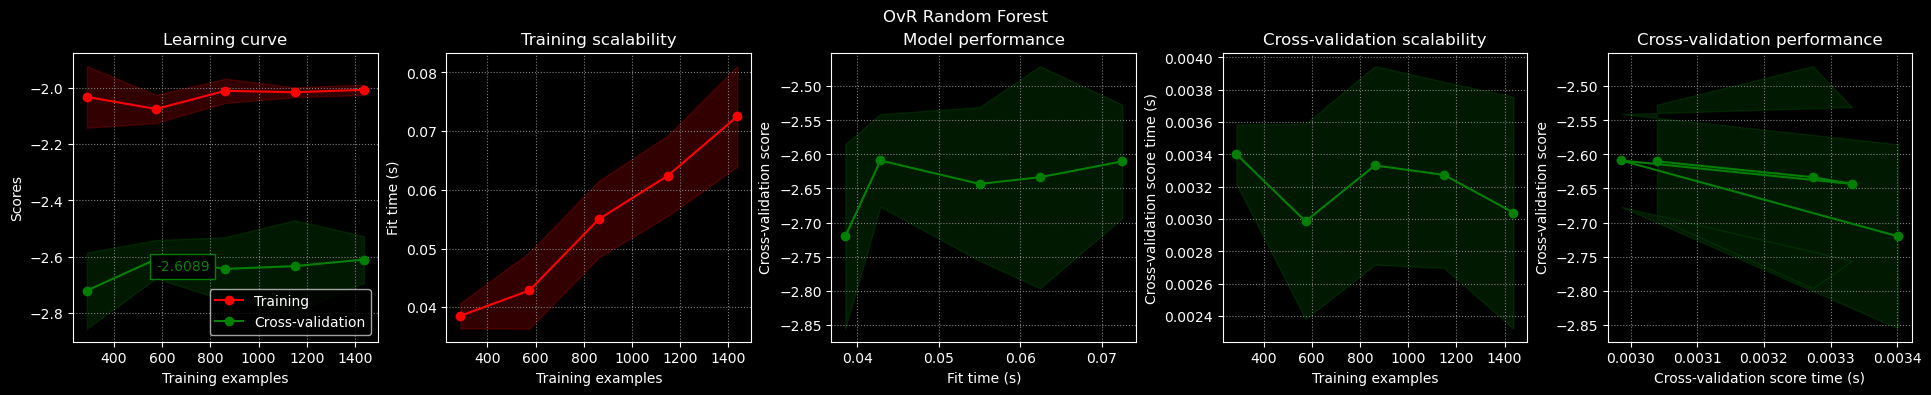

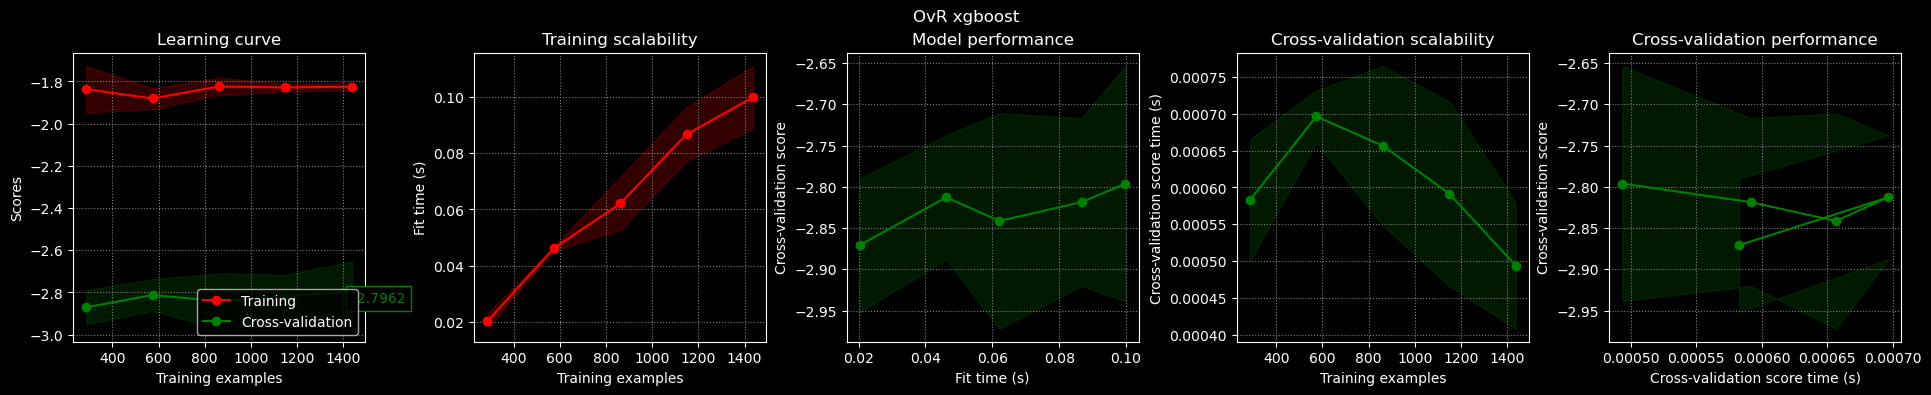

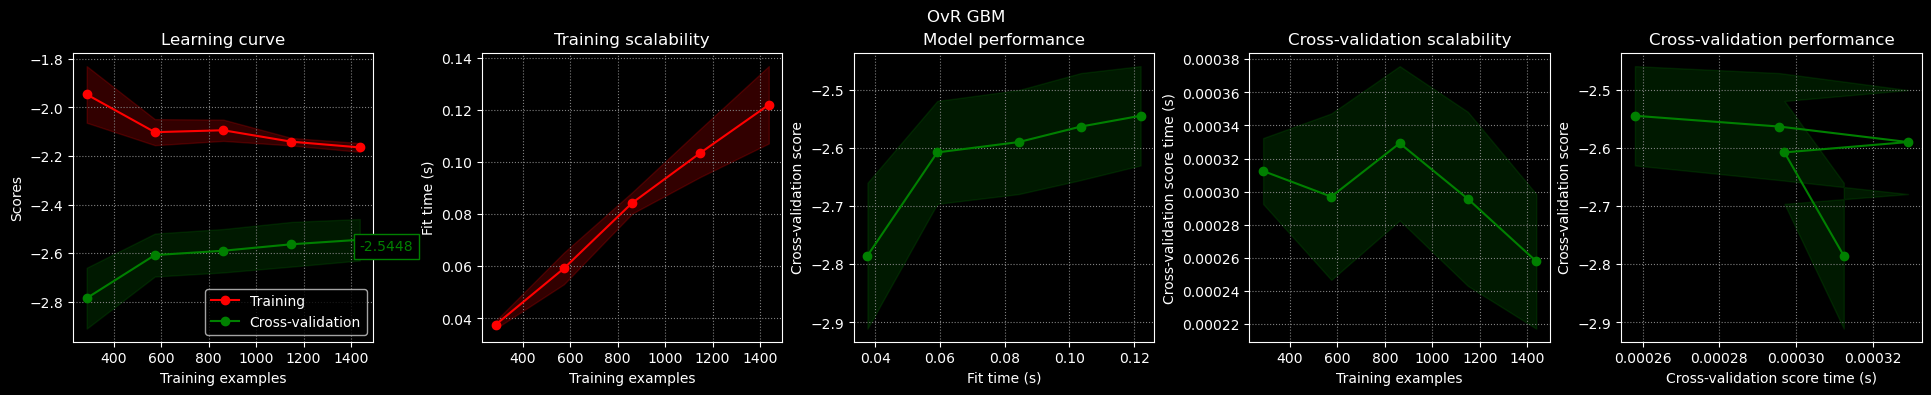

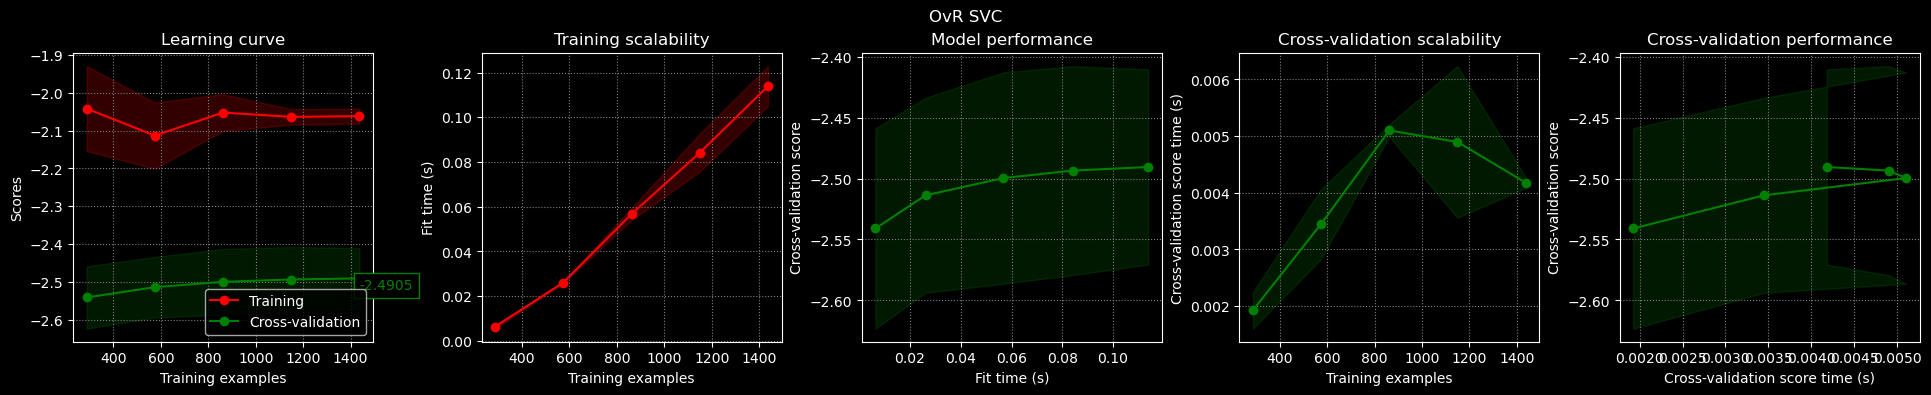

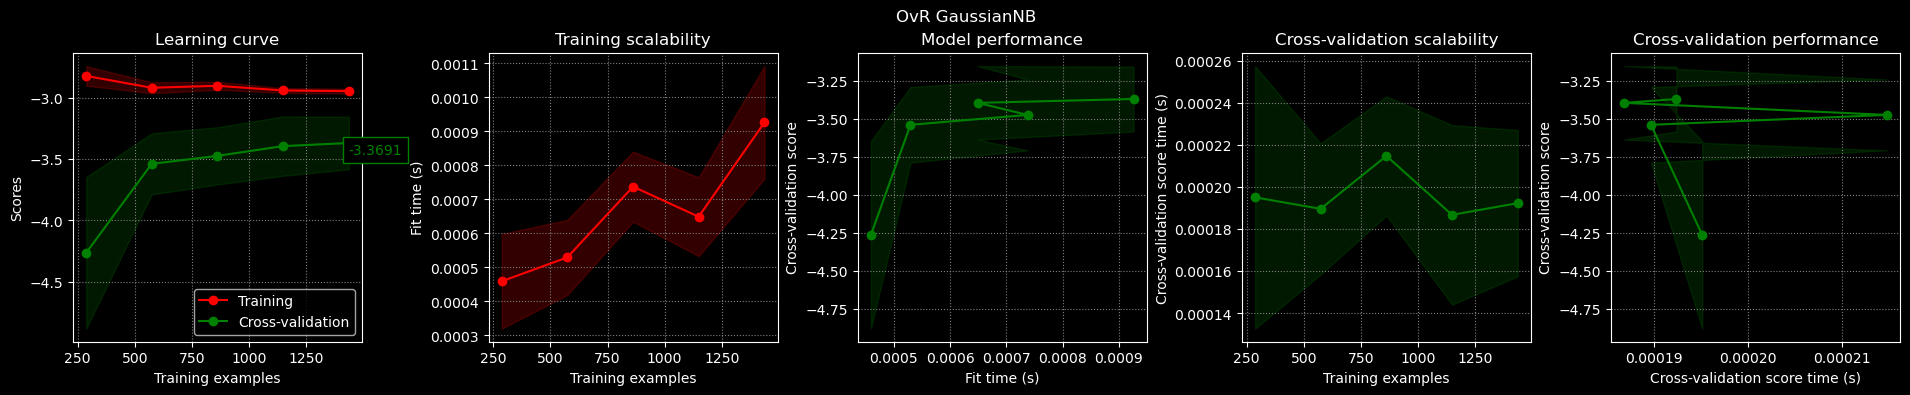

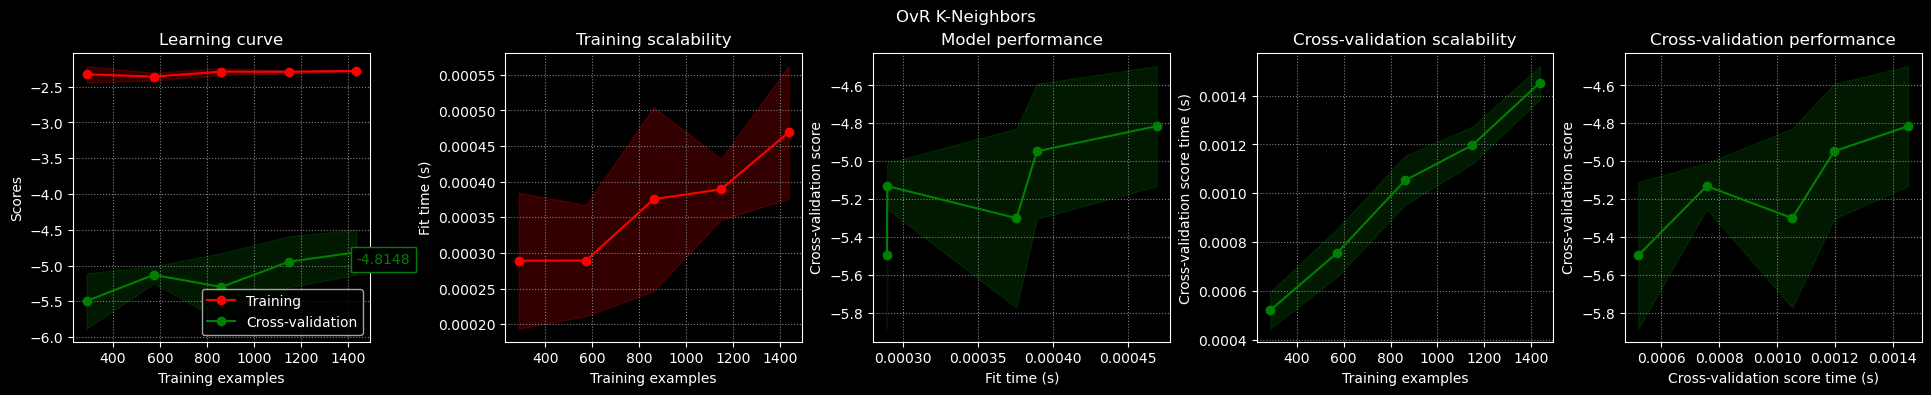

In [16]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)
for title, estimator in estimators.items():
    plot_learning_curve(estimator, X, y, title=title, cv=cv, scoring='neg_log_loss', n_jobs=14)

## Multi-output Multi-class

[From documentation:](https://scikit-learn.org/stable/modules/multiclass.html)

> **Multioutput-multiclass** classification and multi-task classification means that a single estimator has to handle several joint classification tasks. This is **both a generalization of the multi-label classification task**, which only considers binary classification, **as well as a generalization of the multi-class classification task**. The output format is a 2d numpy array or sparse matrix.

> The set of labels can be different for each output variable. For instance, a sample could be assigned “pear” for an output variable that takes possible values in a finite set of species such as “pear”, “apple”; and “blue” or “green” for a second output variable that takes possible values in a finite set of colors such as “green”, “red”, “blue”, “yellow”…

> This means that any classifiers handling multi-output multiclass or multi-task classification tasks, support the multi-label classification task as a special case. Multi-task classification is similar to the multi-output classification task with different model formulations. For more information, see the relevant estimator documentation.

> All scikit-learn classifiers are capable of multiclass classification, but the meta-estimators offered by `sklearn.multiclass` permit changing the way they handle more than two classes because this may have an effect on classifier performance (either in terms of generalization error or required computational resources).

> Multioutput classification support can be added to any classifier with `MultiOutputClassifier`. This strategy consists of fitting one classifier per target. This allows multiple target variable classifications. The purpose of this class is to extend estimators to be able to estimate a series of target functions (f1,f2,f3…,fn) that are trained on a single X predictor matrix to predict a series of responses (y1,y2,y3…,yn).

In [17]:
from sklearn.datasets import make_classification
from sklearn.utils import shuffle
X, y = make_classification(n_samples=1000, n_features=20, n_informative=20, n_redundant=0, n_repeated=0, n_classes=3,
                            flip_y = 0.001,   # default=0.01, the larger the harder
                            class_sep = 3.0, # default=1.0, the larger the easier 
                            random_state=1)
y2 = shuffle(y, random_state=1)
y = np.vstack((y, y2)).T
print(f'X {X.shape}')
print(f'y {y.shape} Average labels: {np.ceil(np.sum(y, axis=1).mean()):.0f}')
print(f'classes: {np.unique(y)}')
print(f'Label combinations:\n{np.unique(y, axis=0)}')

X (1000, 20)
y (1000, 2) Average labels: 2
classes: [0 1 2]
Label combinations:
[[0 0]
 [0 1]
 [0 2]
 [1 0]
 [1 1]
 [1 2]
 [2 0]
 [2 1]
 [2 2]]


In [18]:
X = MaxAbsScaler().fit_transform(X)

The following classifiers support multiclass-multioutput:

* sklearn.tree.DecisionTreeClassifier
* sklearn.tree.ExtraTreeClassifier
* sklearn.ensemble.ExtraTreesClassifier
* sklearn.neighbors.KNeighborsClassifier
* sklearn.neighbors.RadiusNeighborsClassifier
* sklearn.ensemble.RandomForestClassifier

**Warning:** At present, no metric in **sklearn.metrics** supports the multioutput-multiclass classification task.

In [19]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier

estimators = [# ('MOC Dummy (prior)', MultiOutputClassifier(DummyClassifier(strategy='prior'))), # FutureWarning: `n_features_in_` is deprecated in 1.0 and will be removed in 1.2.
              ('MOC Logistic (lbfgs, ovr)', MultiOutputClassifier(LogisticRegression(max_iter=200, multi_class='ovr'))),
              ('MOC Logistic (lbfgs, multinomial)', MultiOutputClassifier(LogisticRegression(max_iter=200, multi_class='multinomial'))),
              ('MOC Logistic (liblinear, ovr)', MultiOutputClassifier(LogisticRegression(solver='liblinear', multi_class='ovr'))),
              ('MOC Random Forest', MultiOutputClassifier(RandomForestClassifier())),
              ('MOC xgboost', MultiOutputClassifier(XGBClassifier())),
              ('MOC GBM', MultiOutputClassifier(GradientBoostingClassifier())),
              ('MOC SVC', MultiOutputClassifier(SVC(probability=True))),
              ('MOC GaussianNB', MultiOutputClassifier(GaussianNB())),
              ('MOC K-Neighbors', MultiOutputClassifier(KNeighborsClassifier()))
            ]

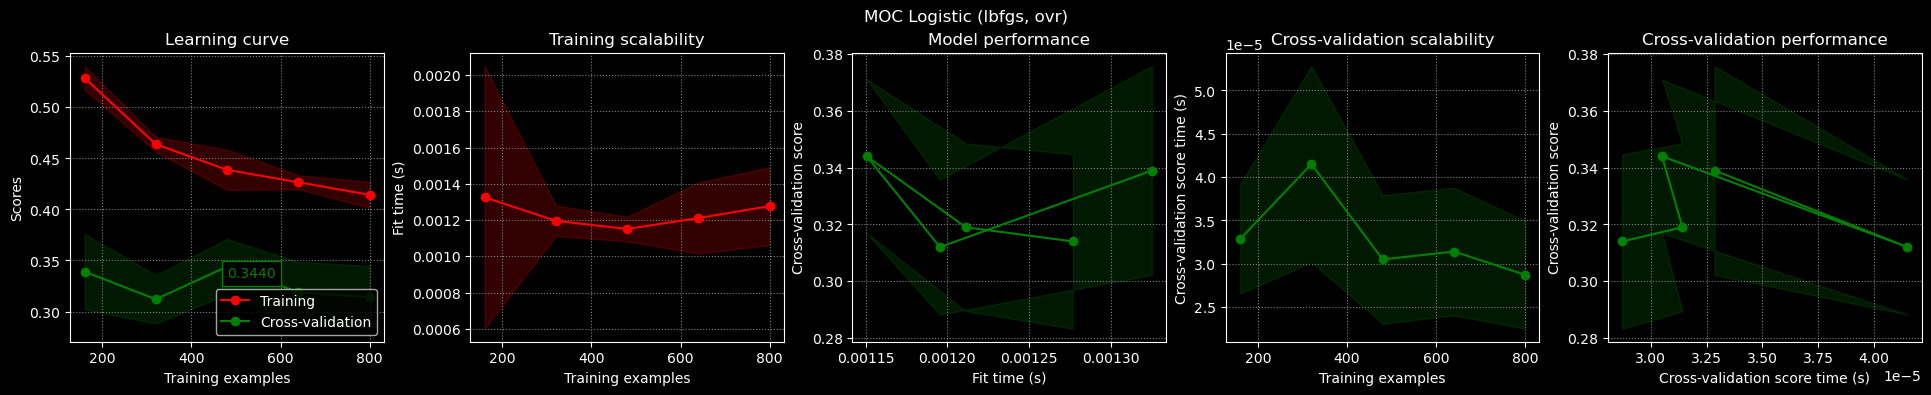

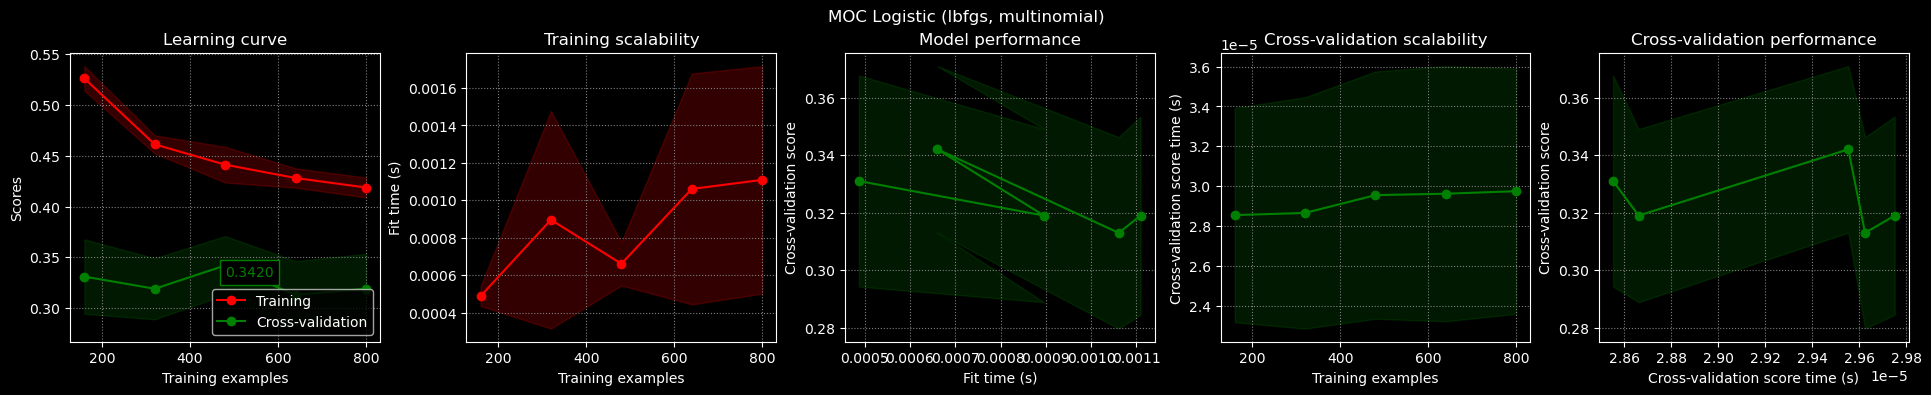

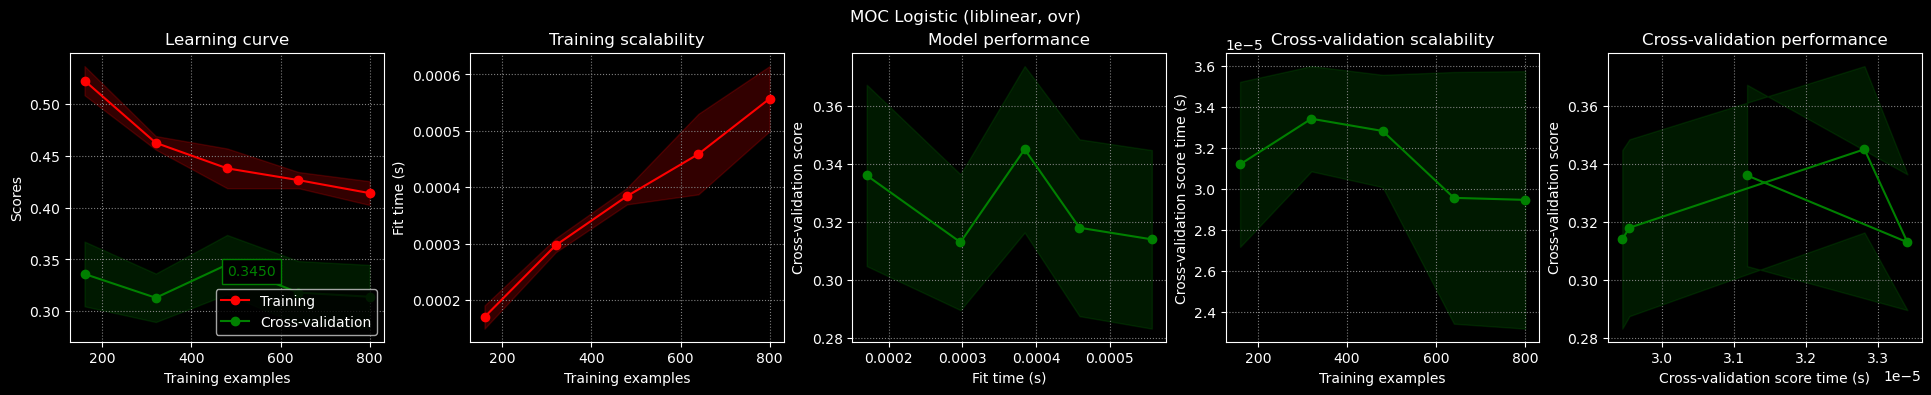

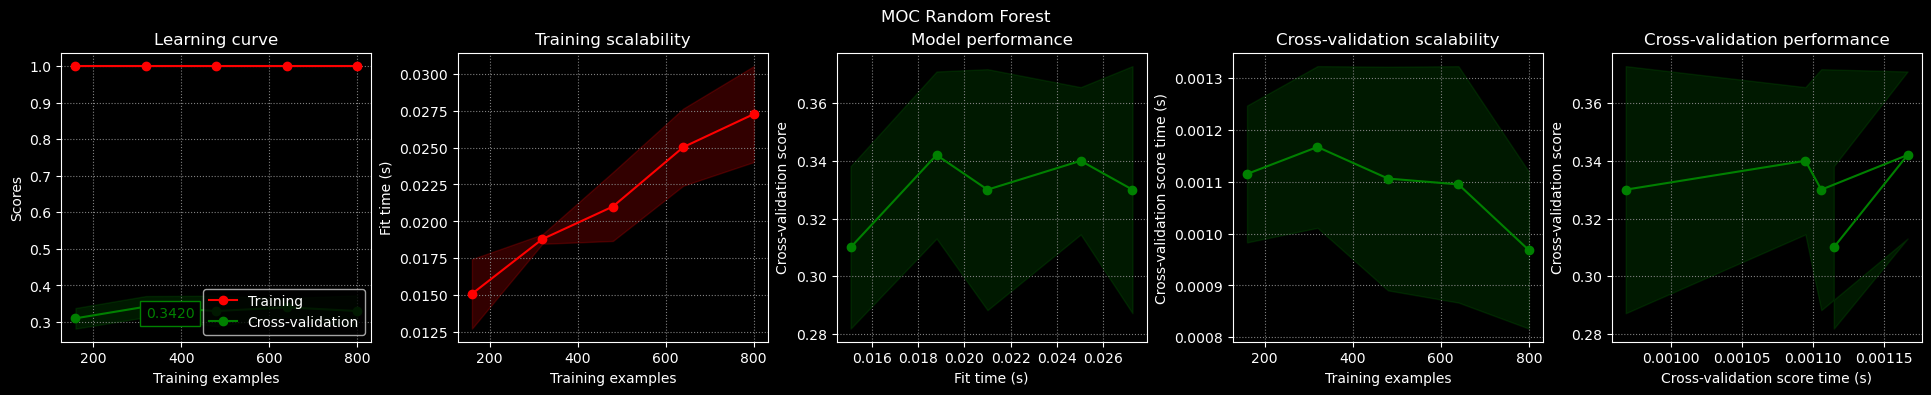

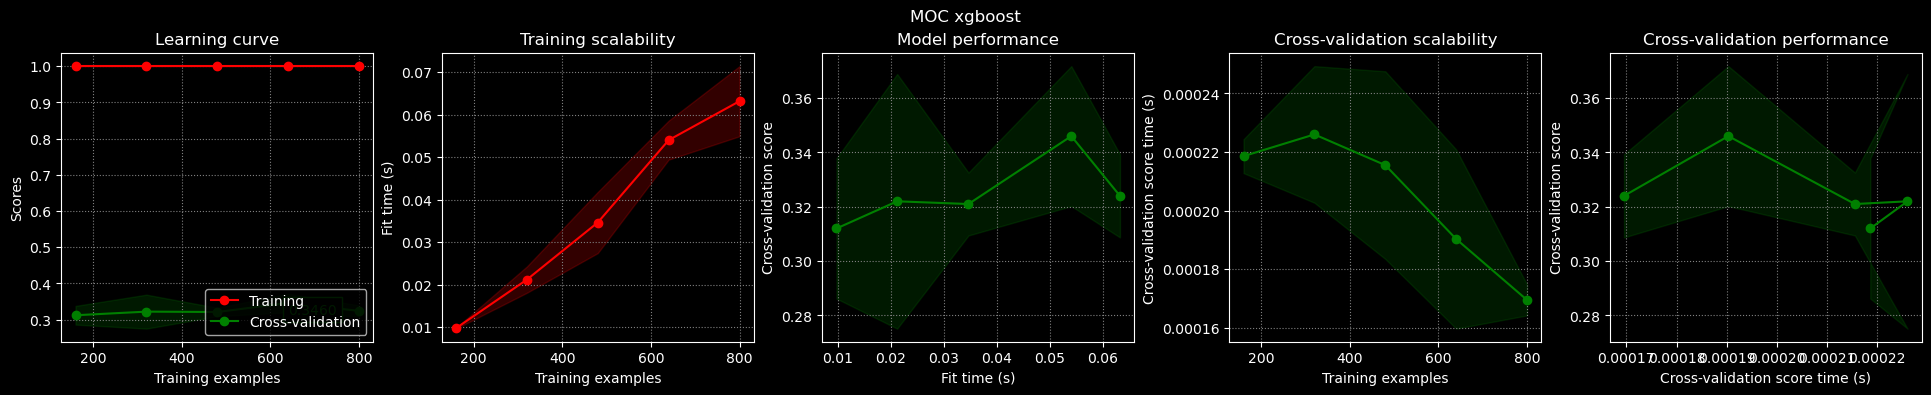

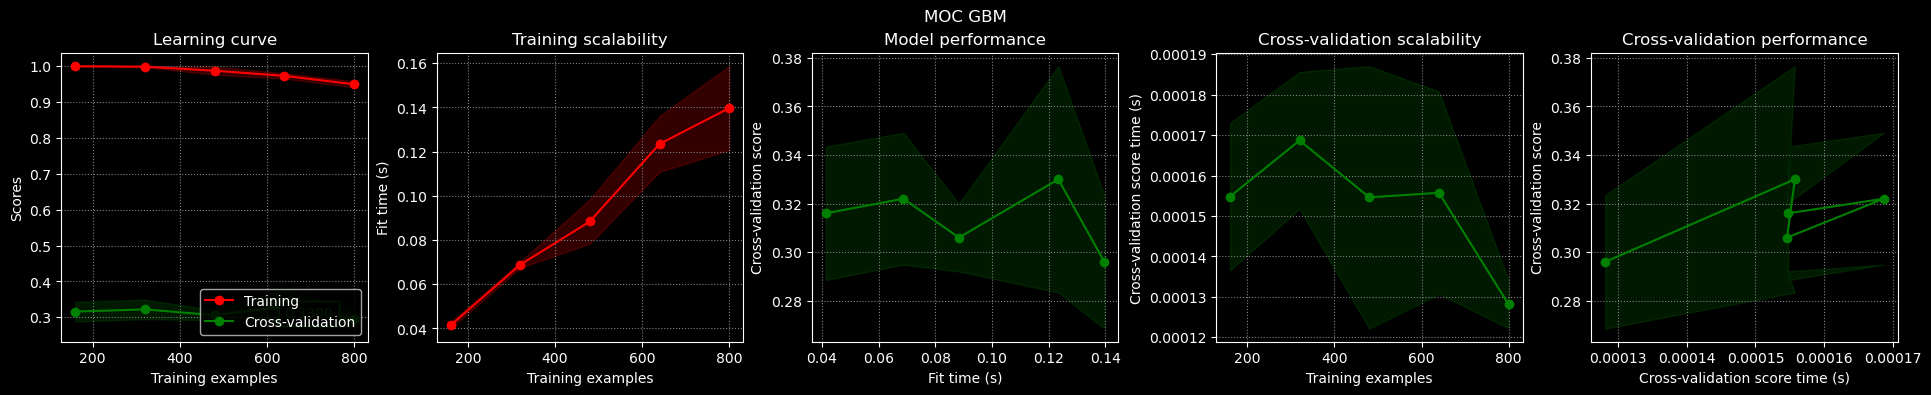

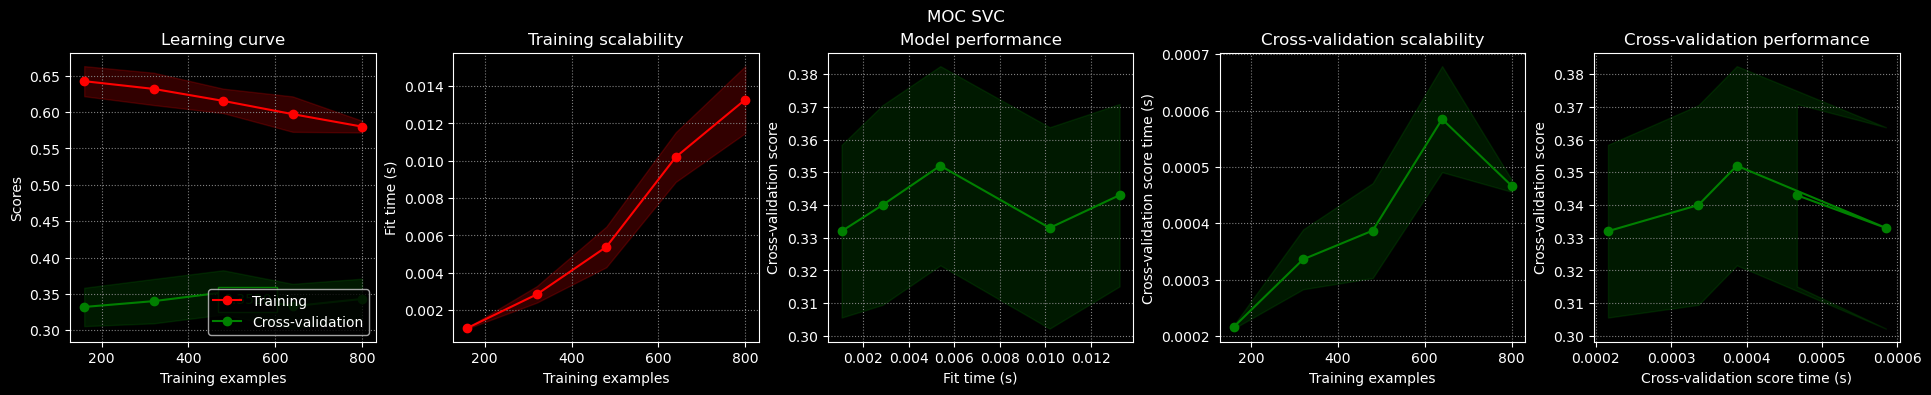

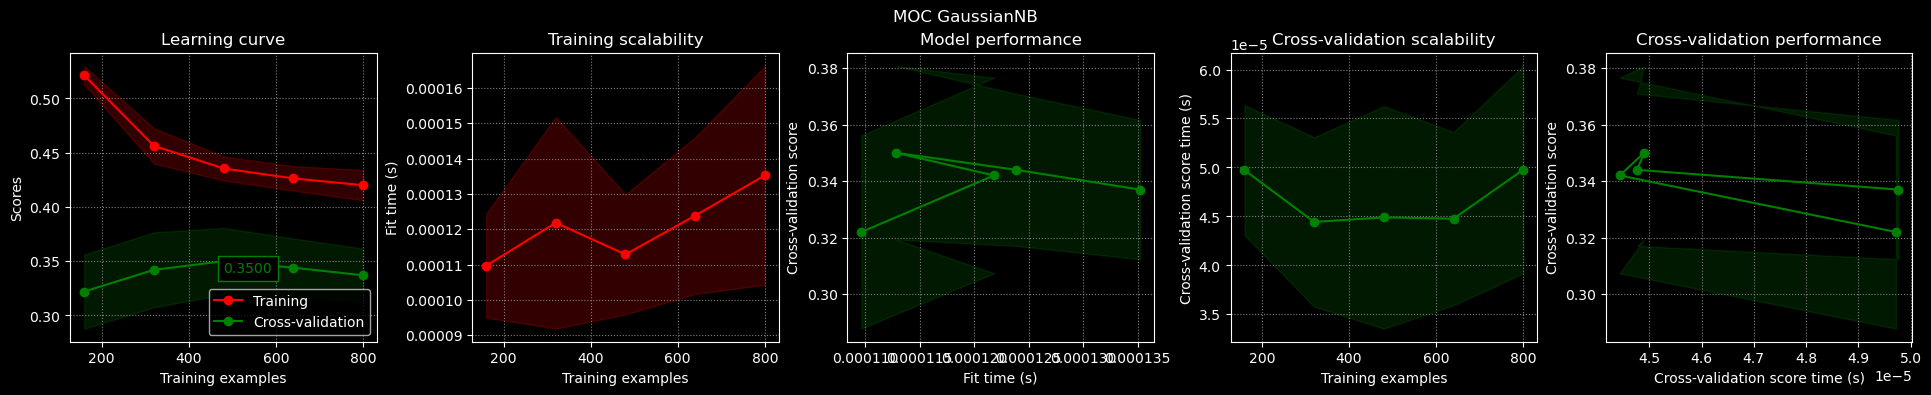

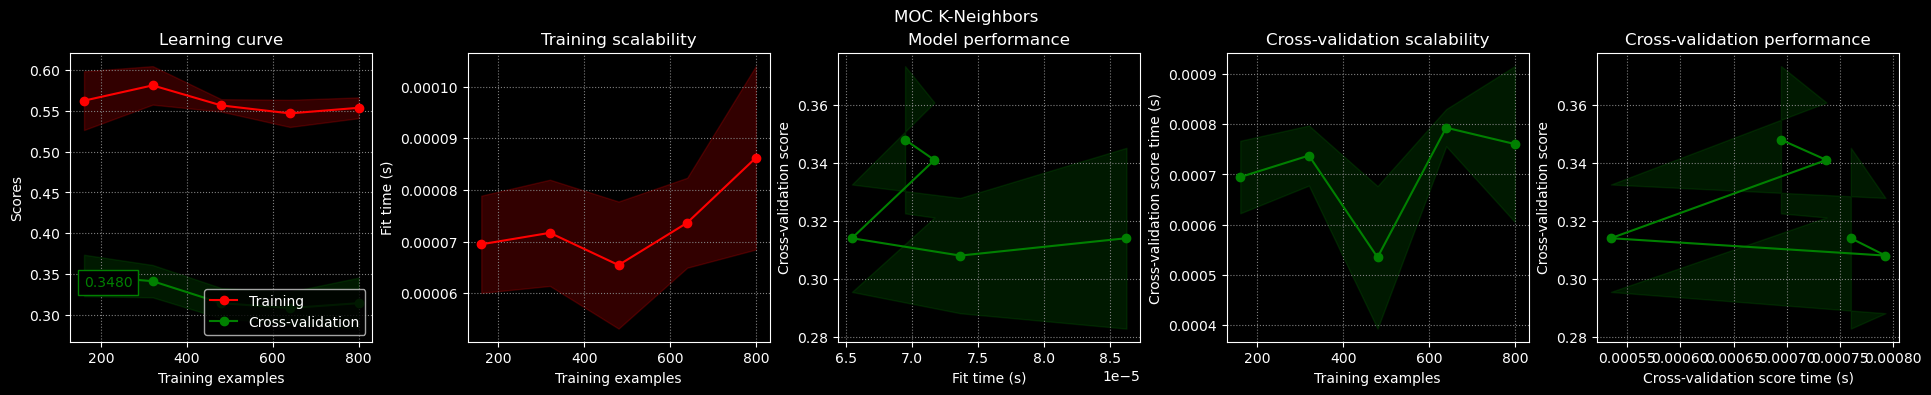

In [20]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)
for title, estimator in estimators:
    plot_learning_curve(estimator, X, y, title=title, cv=cv, scoring=None, n_jobs=14)